In [395]:
import glob
import scipy.optimize as spopt
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import join as opj
from matplotlib.ticker import FormatStrFormatter

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 5})

In [396]:
#GLOBAL CONSTs
preStim = 40

In [397]:
base_dir = '/home/brainy/Documents/15tdata/Processing'
os.chdir(base_dir)

In [398]:
#Get SUBJECT name
dirs_list = os.listdir(base_dir)
sub = glob.glob('*ROIs*')
print('Subjects in the list {} '.format(sub))

Subjects in the list ['THUY_ROIs', 'DRIM_ROIs', 'THAN_ROIs'] 


In [399]:
#Get SESSIONS name
ses_list = [os.listdir(opj(base_dir, k)) for k in sub]
for i in range(np.size(sub)):
    print(' Subject {} : {} '.format(sub[i], ses_list[i][:]))

 Subject THUY_ROIs : ['NEG_ROIs', 'P_b_N_proc', 'P_R_proc', 'N_R_proc', 'POS_by_NEG_ROIs', 'POS_ROIs'] 
 Subject DRIM_ROIs : ['NEG_ROIs', 'P_R_proc', 'B_b_N_proc', 'POS_by_NEG_ROIs', 'POS_ROIs'] 
 Subject THAN_ROIs : ['NEG_ROIs', 'P_b_N_proc', 'P_R_proc', 'N_R_proc', 'POS_by_NEG_ROIs', 'POS_ROIs'] 


In [401]:
from natsort import realsorted
#Get FILES in SESSION 

i = 1
j = 4

print(' subj - {}, \n session - {}, \n files = {}'.format(
    sub[i], ses_list[i][j], len(os.listdir(opj(base_dir,
                                               sub[i],
                                               ses_list[i][j])))))

filelist = realsorted(os.listdir(opj(base_dir, 
                                     sub[i],
                                     ses_list[i][j])))

 subj - DRIM_ROIs, 
 session - POS_ROIs, 
 files = 112


In [402]:
#ROIs = ['ROI_LeftBFD', 'ROI_LeftBfdAud', 'ROI_RightBFD']
ROIs = ['ROI_LeftBFD', 'ROI_RightBFD', 'ROI_Thal_L', 'ROI_Thal_R']

In [403]:
# Create a dictionary based on ROIs
filesDict = {}
for ROI in ROIs:
    filesDict[ROI] = glob.glob(opj(base_dir, sub[i], 
                                           ses_list[i][j])
                                           + '/' + '*'
                                           + ROI
                                           + '*.txt')
    
    print('Files for {} : '.format(ROI) + '{}'.format(filesDict[ROI]) + '\n')

Files for ROI_LeftBFD : ['/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/42_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/69_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/26_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/35_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/53_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/25_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/36_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/61_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/59_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/10_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/76_ROI_LeftBFD_2p.txt', '/home/brainy/Documents/15tda

In [404]:
dataDict = {}
for ROI in ROIs:
    
    dataSink = []
    BL = []
    STD = []
    
    print(25*'-', ROI , 25*'-')
    for file in realsorted(filesDict[ROI]):
        
        print(file)
        dataSink.append(np.loadtxt(file))
        
        #BL derrivation
        BL.append(np.mean(np.loadtxt(file)[0:preStim]))
       
        #STD of BL derrivation
        STD.append(np.std(np.loadtxt(file)[0:preStim]))
        
    dataDict[ROI] = dataSink
    print(np.shape(dataSink))
    dataDict['BL_' + ROI] = BL
    dataDict['STD_' + ROI] = STD
    
    y = dataDict['STD_'+ ROI]
    x = np.linspace(0, np.shape(dataDict[ROI])[0], 
                   num = np.shape(dataDict[ROI])[0])
    # find L1 line fit
    l1_fit = lambda x0, x, y: np.sum(np.abs(x0[0] * x + x0[1] - y))
    X1 = spopt.fmin(func=l1_fit, x0=[1, 1], args=(x, y))
    print(X1)
    # find L2 line fit
    l2_fit = lambda x0, x, y: np.sum(np.power(x0[0] * x + x0[1] - y, 2))
    X2 = spopt.fmin(func=l2_fit, x0=[1, 1], args=(x, y))
    print(X2)
    
    dataDict['L1_norm' + ROI] = X1[0]*x + X1[1]
    dataDict['L2_norm' + ROI] = X2[0]*x + X2[1]
    
del dataSink, BL, STD

------------------------- ROI_LeftBFD -------------------------
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/9_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/10_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/11_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/17_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/18_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/19_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/25_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/26_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/27_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/34_ROI_LeftBFD_2p.txt
/home/brainy/Documents/15tdata/Processing/DRIM_ROIs/POS_ROIs/35_ROI_LeftBFD_2p.txt
/home/brainy/Documents/1

In [405]:
print(sorted(dataDict.keys()))

['BL_ROI_LeftBFD', 'BL_ROI_RightBFD', 'BL_ROI_Thal_L', 'BL_ROI_Thal_R', 'L1_normROI_LeftBFD', 'L1_normROI_RightBFD', 'L1_normROI_Thal_L', 'L1_normROI_Thal_R', 'L2_normROI_LeftBFD', 'L2_normROI_RightBFD', 'L2_normROI_Thal_L', 'L2_normROI_Thal_R', 'ROI_LeftBFD', 'ROI_RightBFD', 'ROI_Thal_L', 'ROI_Thal_R', 'STD_ROI_LeftBFD', 'STD_ROI_RightBFD', 'STD_ROI_Thal_L', 'STD_ROI_Thal_R']


In [406]:
# X for baseLine
x_BL = np.linspace(0, np.shape(dataDict[ROIs[0]])[0], 
                   num = np.shape(dataDict[ROIs[0]])[0])
# X for time Course
x_main = np.linspace(0, np.shape(dataDict[ROIs[0]])[1], 
                     num = np.shape(dataDict[ROIs[0]])[1])

In [407]:
#                       PLOTTING AREA

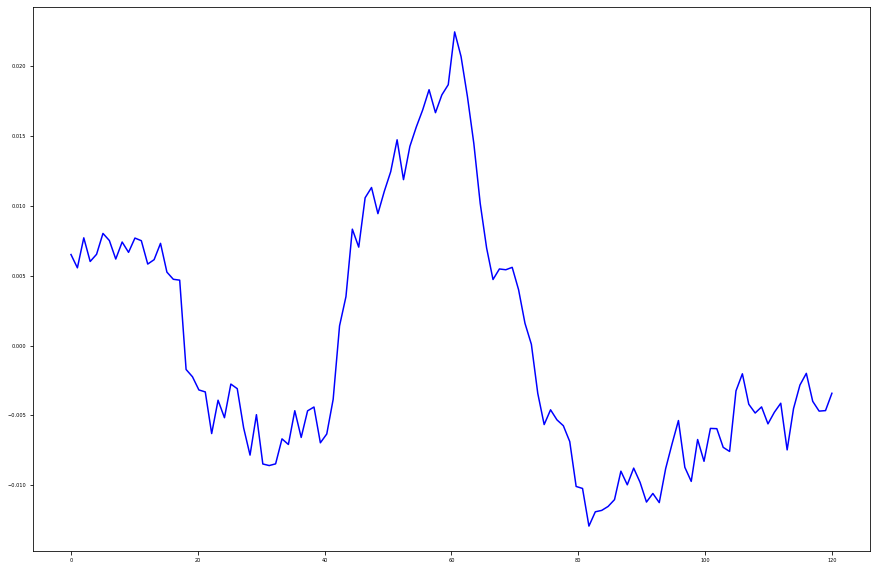

In [408]:
plt.plot(x_main, np.mean(dataDict[ROIs[0]], axis=0)/np.mean(dataDict[ROIs[0]][0:preStim])-1, '-b')

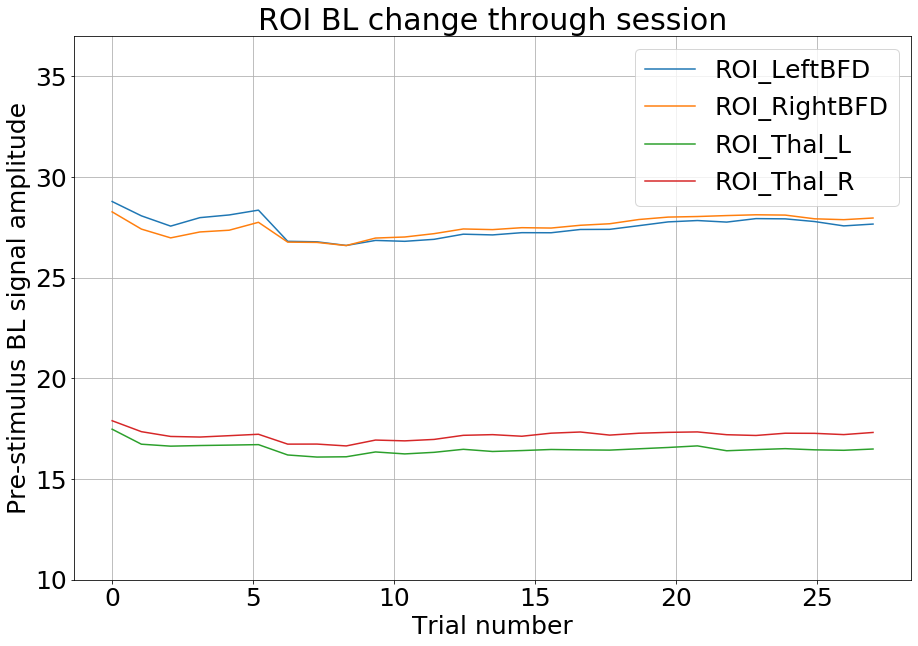

In [410]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 25})

for i in range(len(ROIs)):
    plt.plot(x_BL, dataDict['BL_'+ROIs[i]], '-')
    

ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.set_ylim([10, 37])
plt.title('ROI BL change through session')
#plt.legend(('{}'.format(ROIs[0]), '{}'.format(ROIs[1]), '{}'.format(ROIs[2])), loc='upper right')
plt.legend(('{}'.format(ROIs[0]), '{}'.format(ROIs[1]), '{}'.format(ROIs[2]), '{}'.format(ROIs[3])), loc='upper right')
plt.xlabel('Trial number')
plt.ylabel('Pre-stimulus BL signal amplitude')
plt.grid()
plt.show()

In [411]:
dataDict.keys()

dict_keys(['ROI_LeftBFD', 'BL_ROI_LeftBFD', 'STD_ROI_LeftBFD', 'L1_normROI_LeftBFD', 'L2_normROI_LeftBFD', 'ROI_RightBFD', 'BL_ROI_RightBFD', 'STD_ROI_RightBFD', 'L1_normROI_RightBFD', 'L2_normROI_RightBFD', 'ROI_Thal_L', 'BL_ROI_Thal_L', 'STD_ROI_Thal_L', 'L1_normROI_Thal_L', 'L2_normROI_Thal_L', 'ROI_Thal_R', 'BL_ROI_Thal_R', 'STD_ROI_Thal_R', 'L1_normROI_Thal_R', 'L2_normROI_Thal_R'])

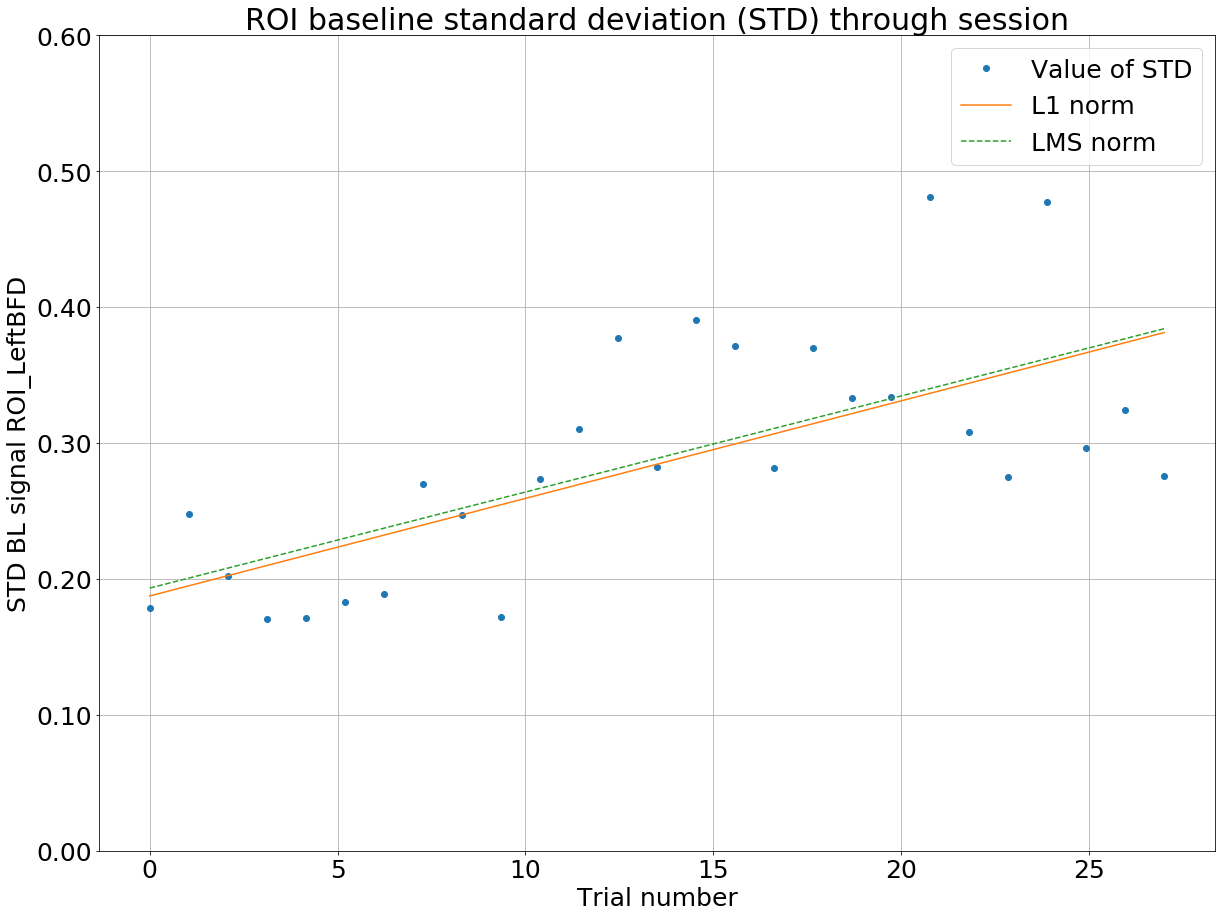

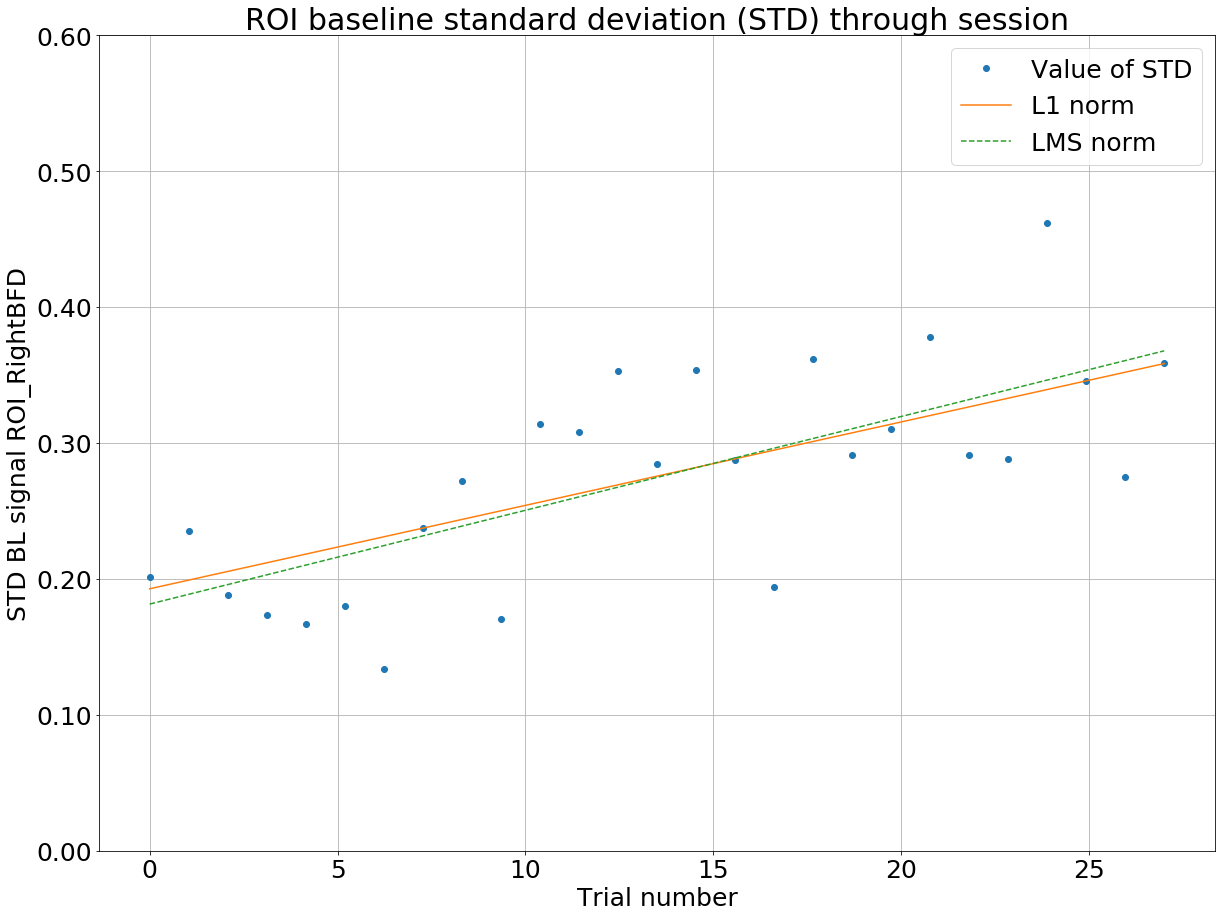

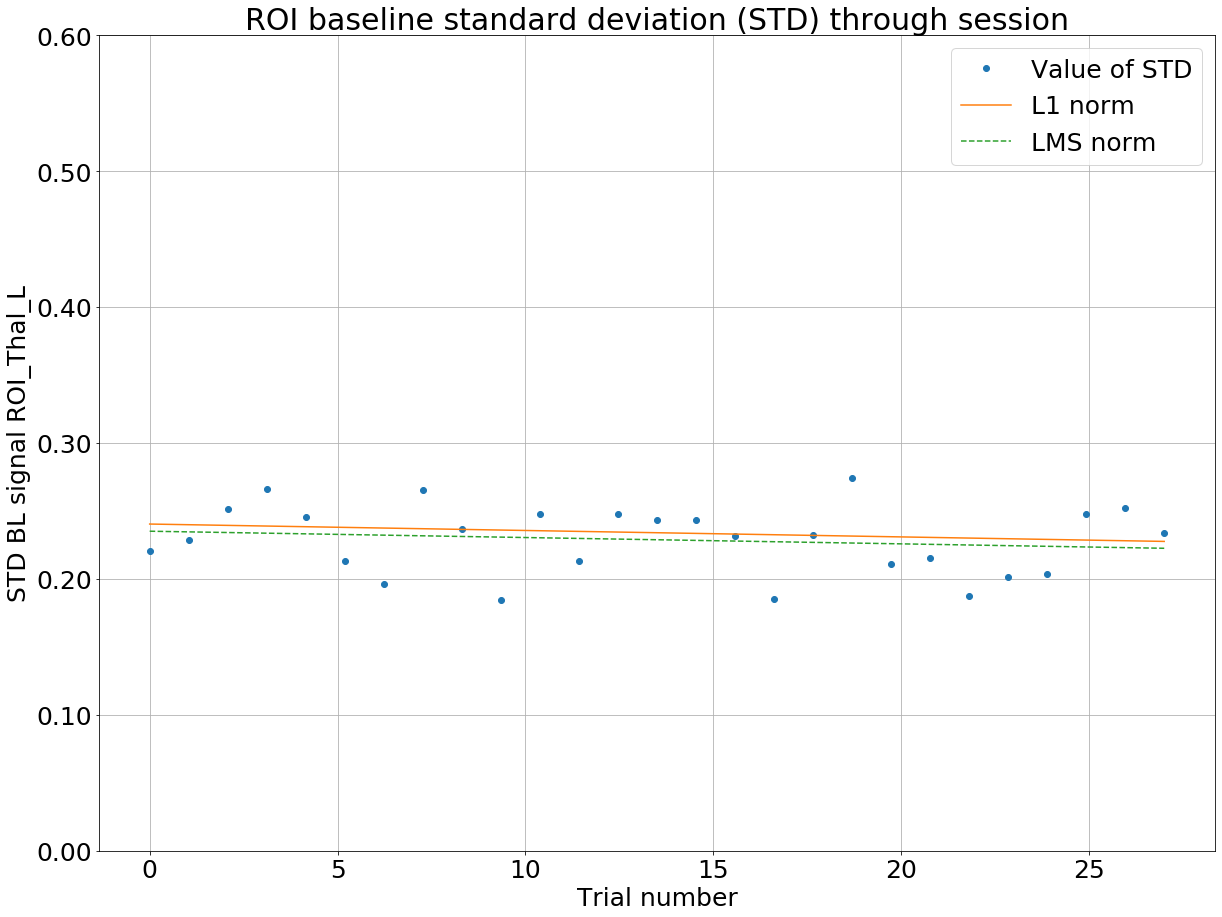

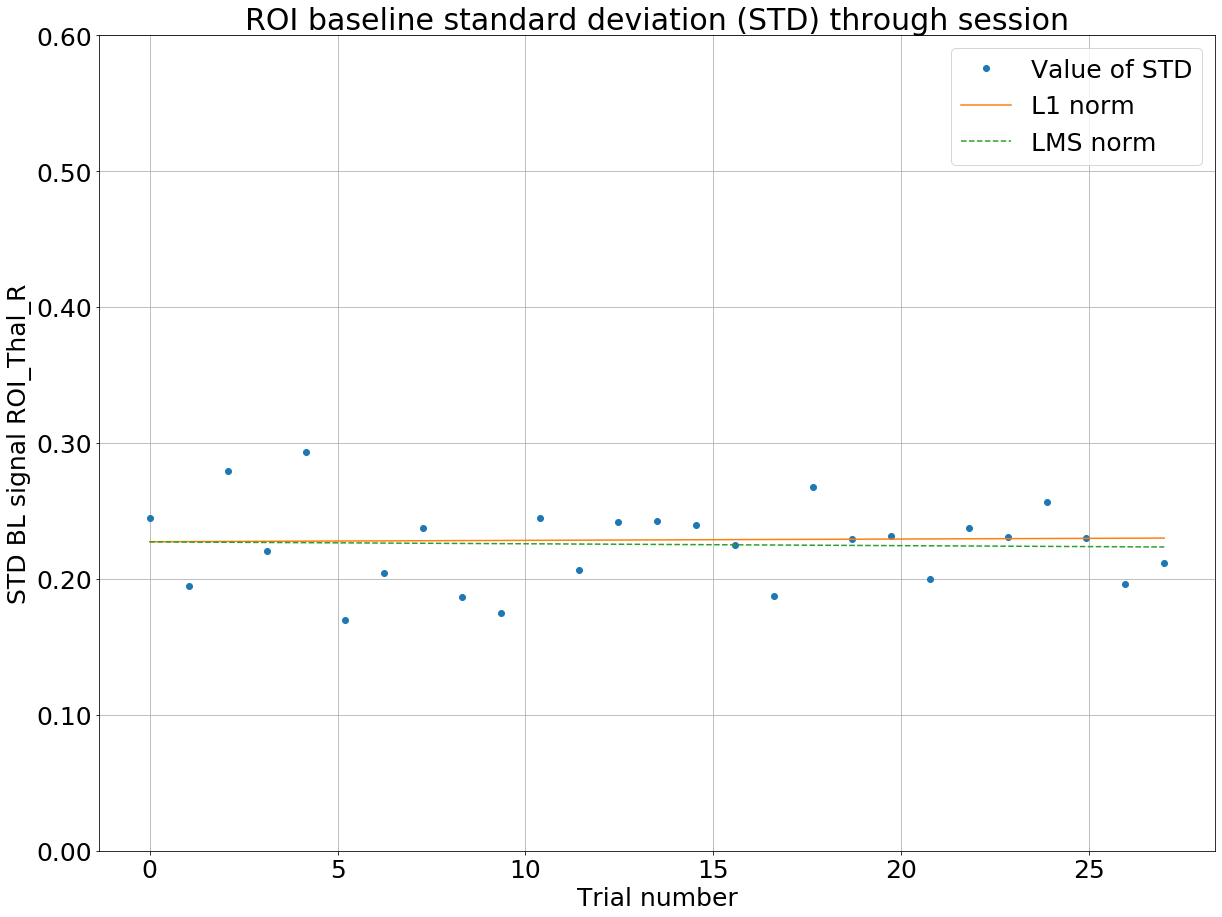

In [412]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams.update({'font.size': 25})


for ROI in ROIs:
    plt.figure()
    
    plt.plot(x_BL, dataDict['STD_'+ ROI], 'o')
    plt.plot(x_BL, dataDict['L1_norm' + ROI], '-')
    plt.plot(x_BL, dataDict['L2_norm' + ROI], '--')
    
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_ylim([0, 0.6])
    plt.legend(('Value of STD', 'L1 norm', 'LMS norm'), loc='upper right')
    plt.title('ROI baseline standard deviation (STD) through session')
    plt.ylabel('STD BL signal ' + ROI)
    plt.xlabel('Trial number')
    plt.grid()

#
#plt.ylabel('STD BL signal amp')

plt.show()

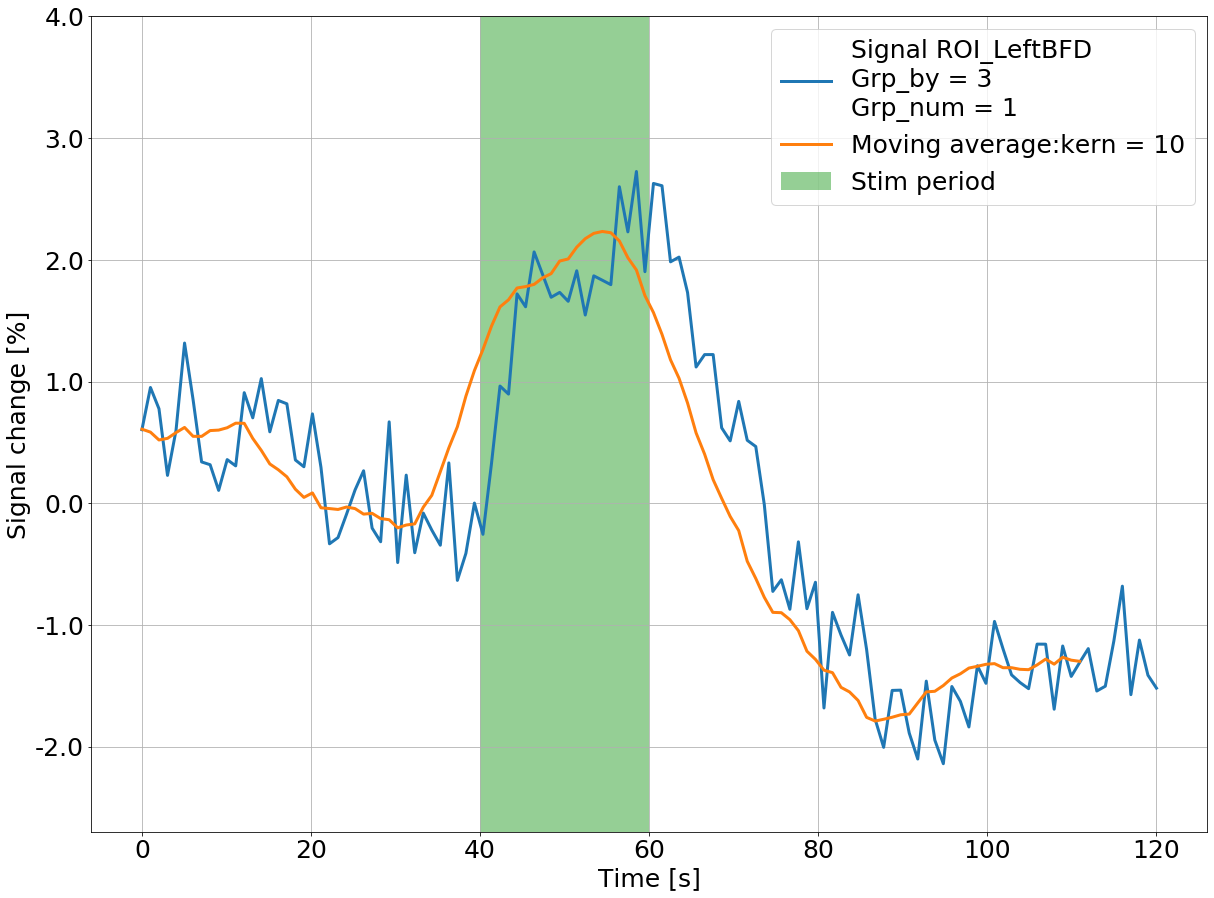

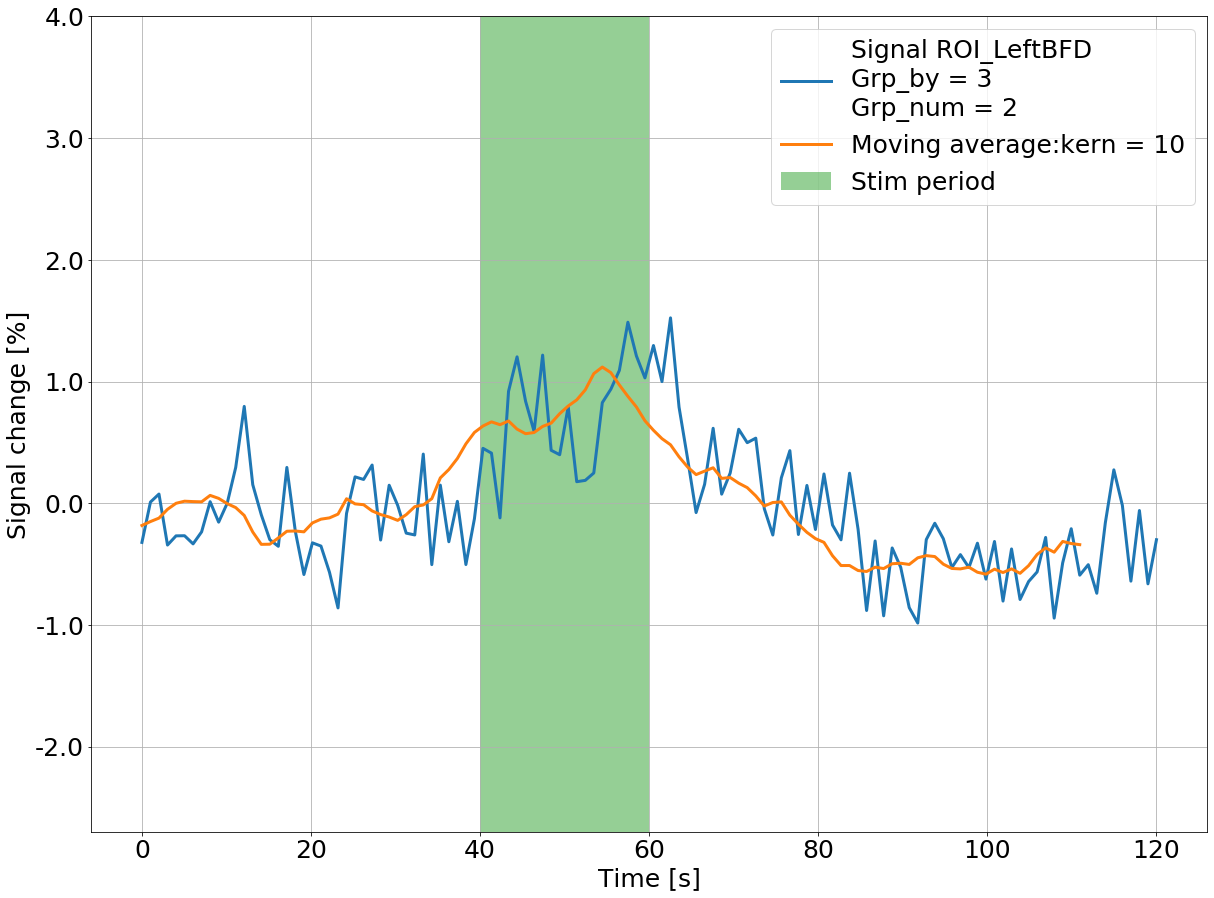

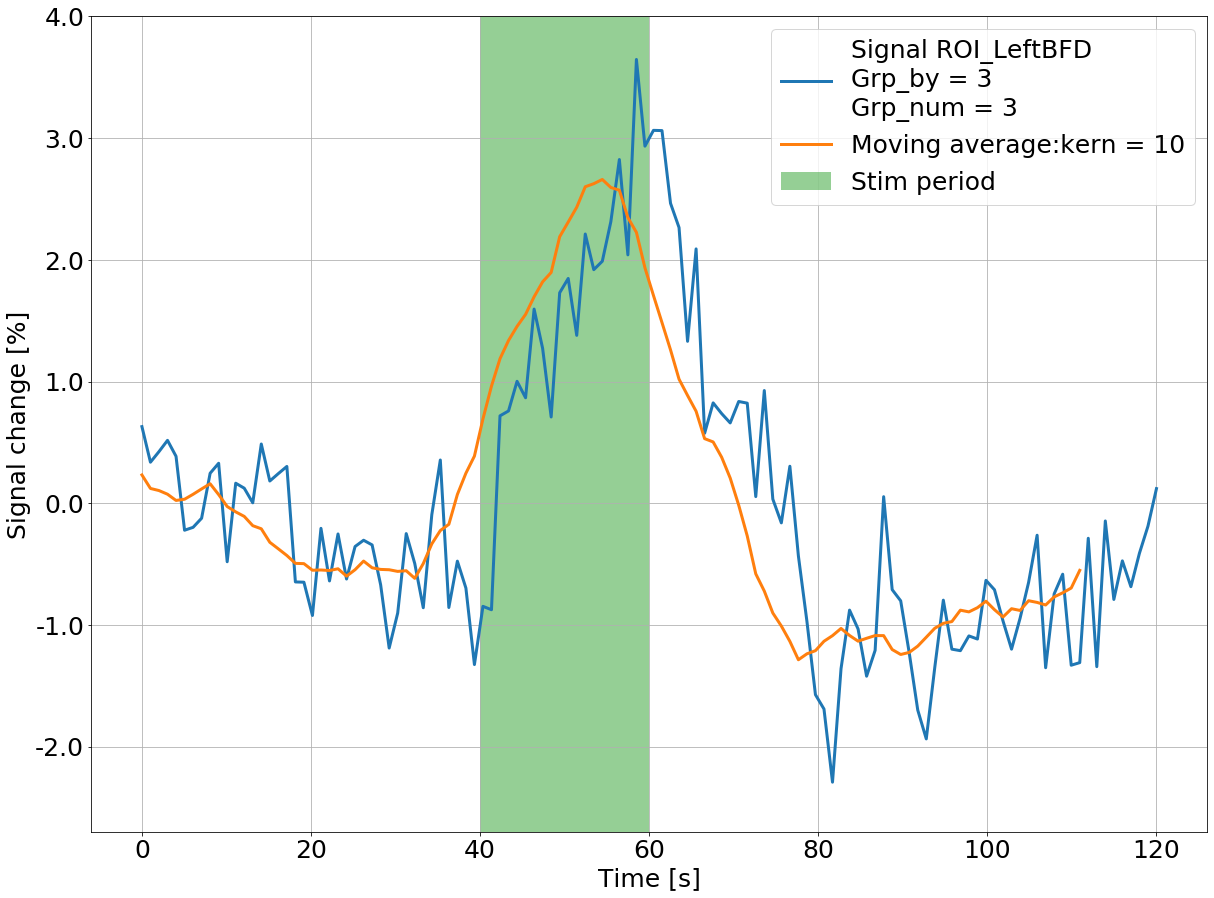

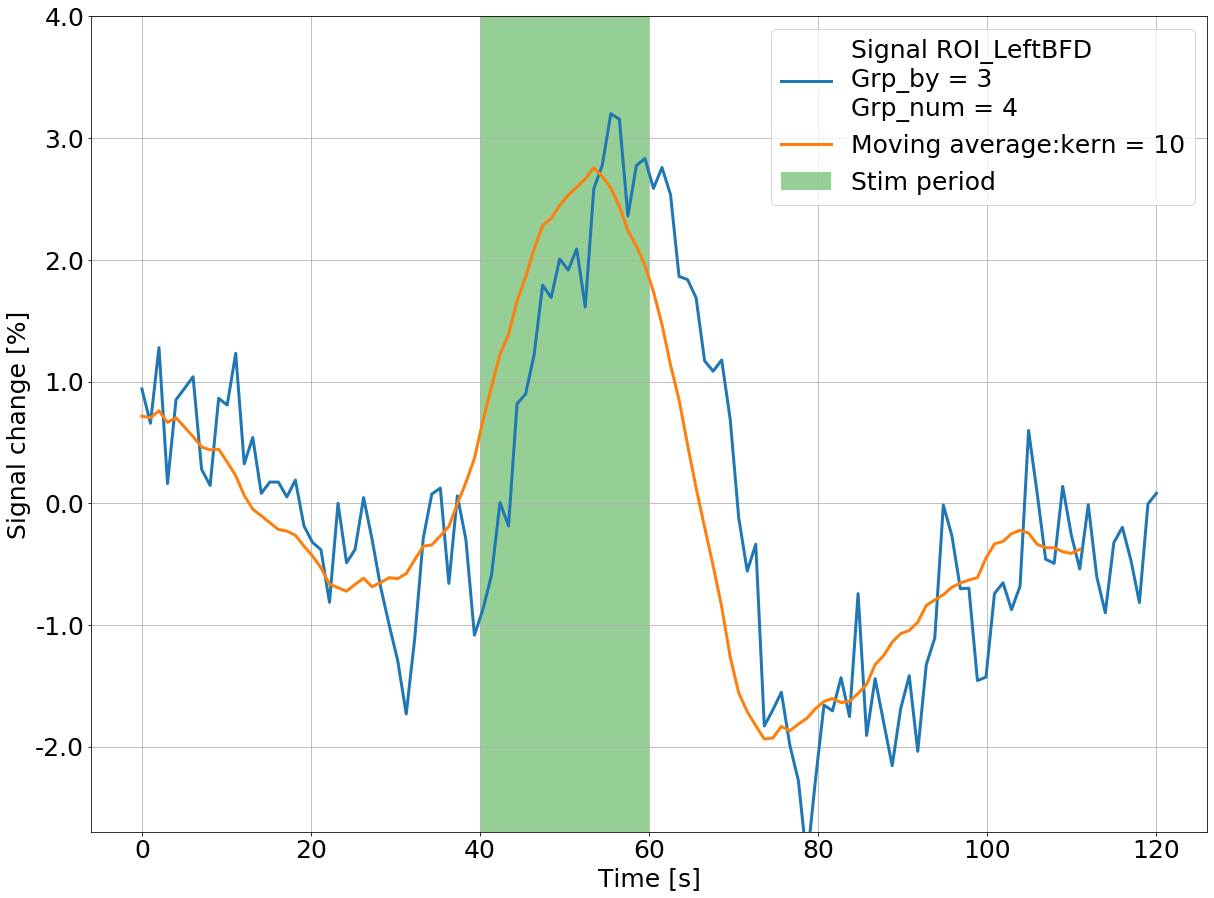

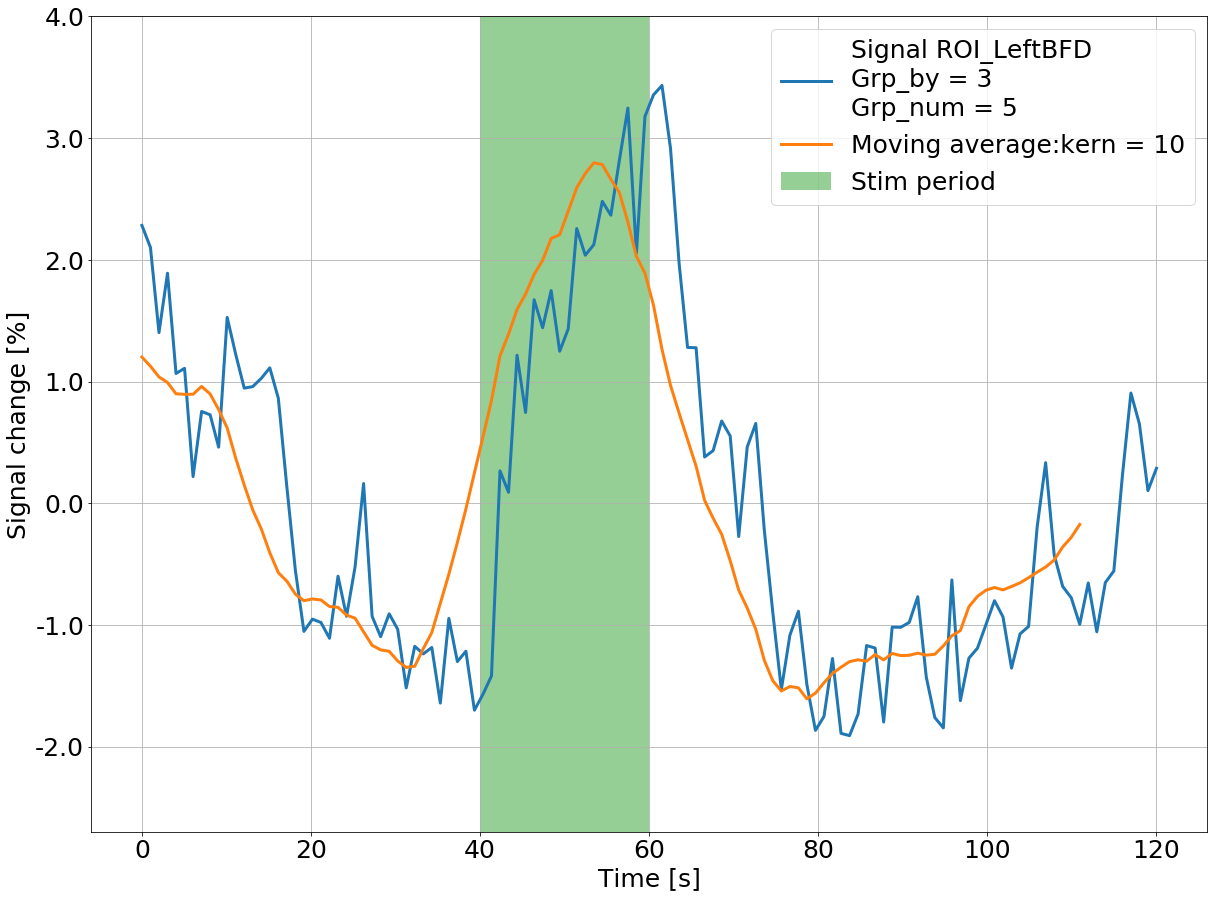

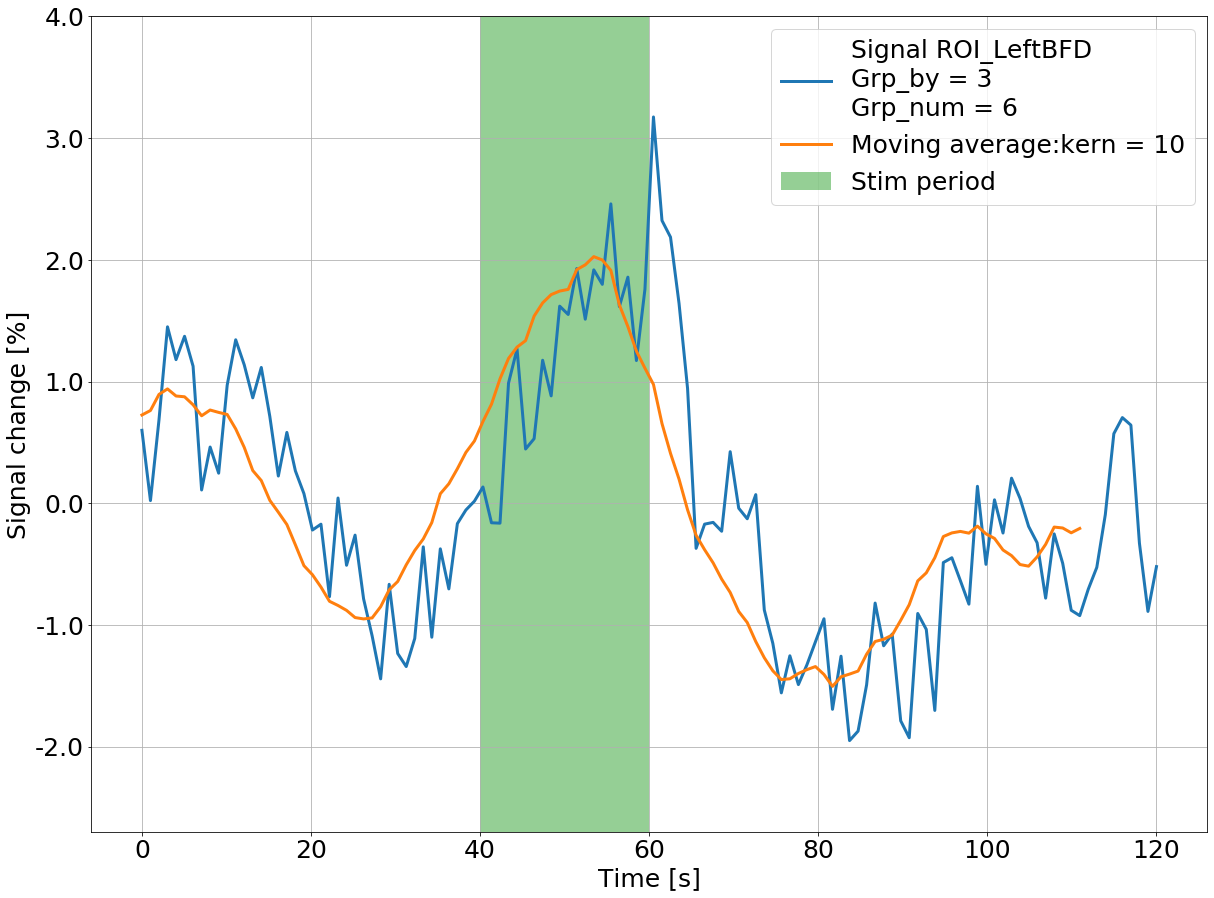

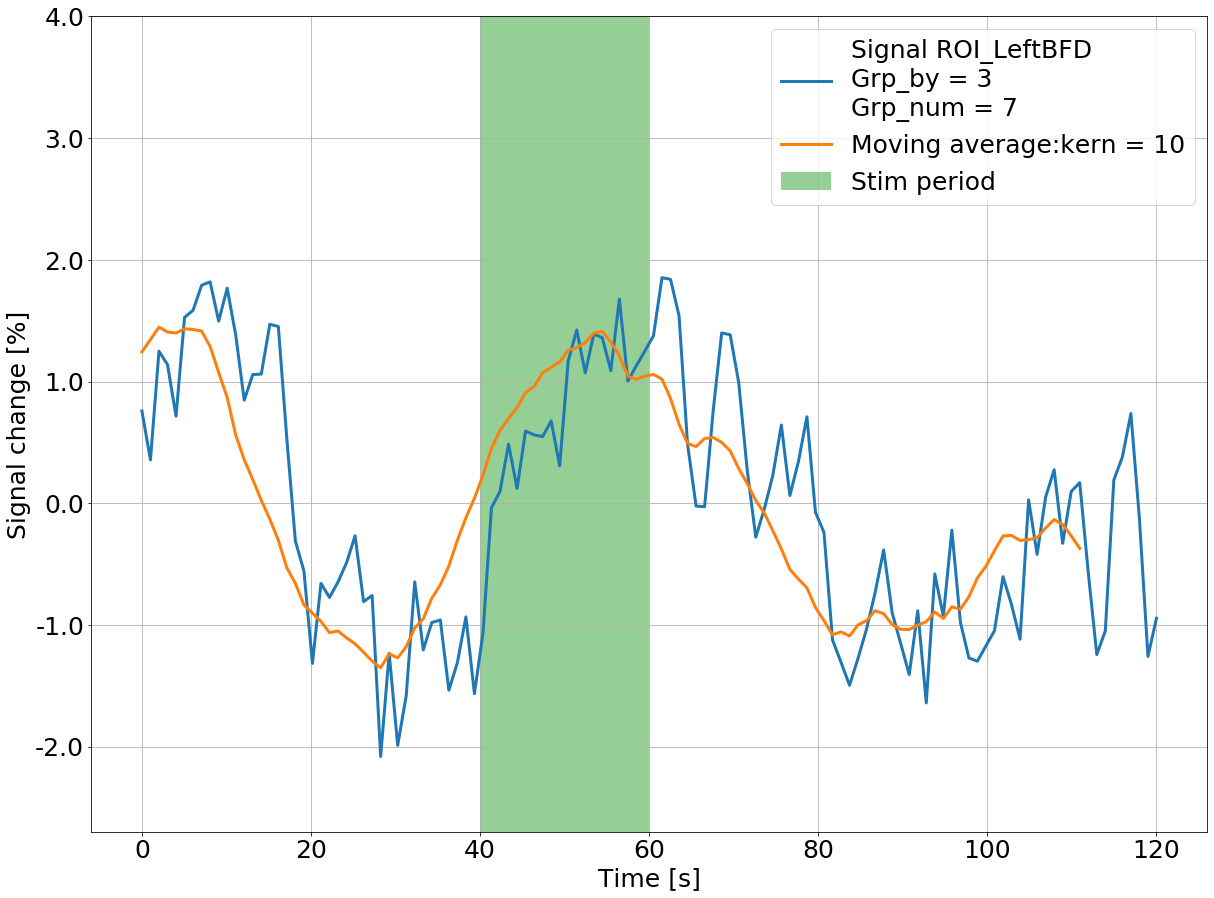

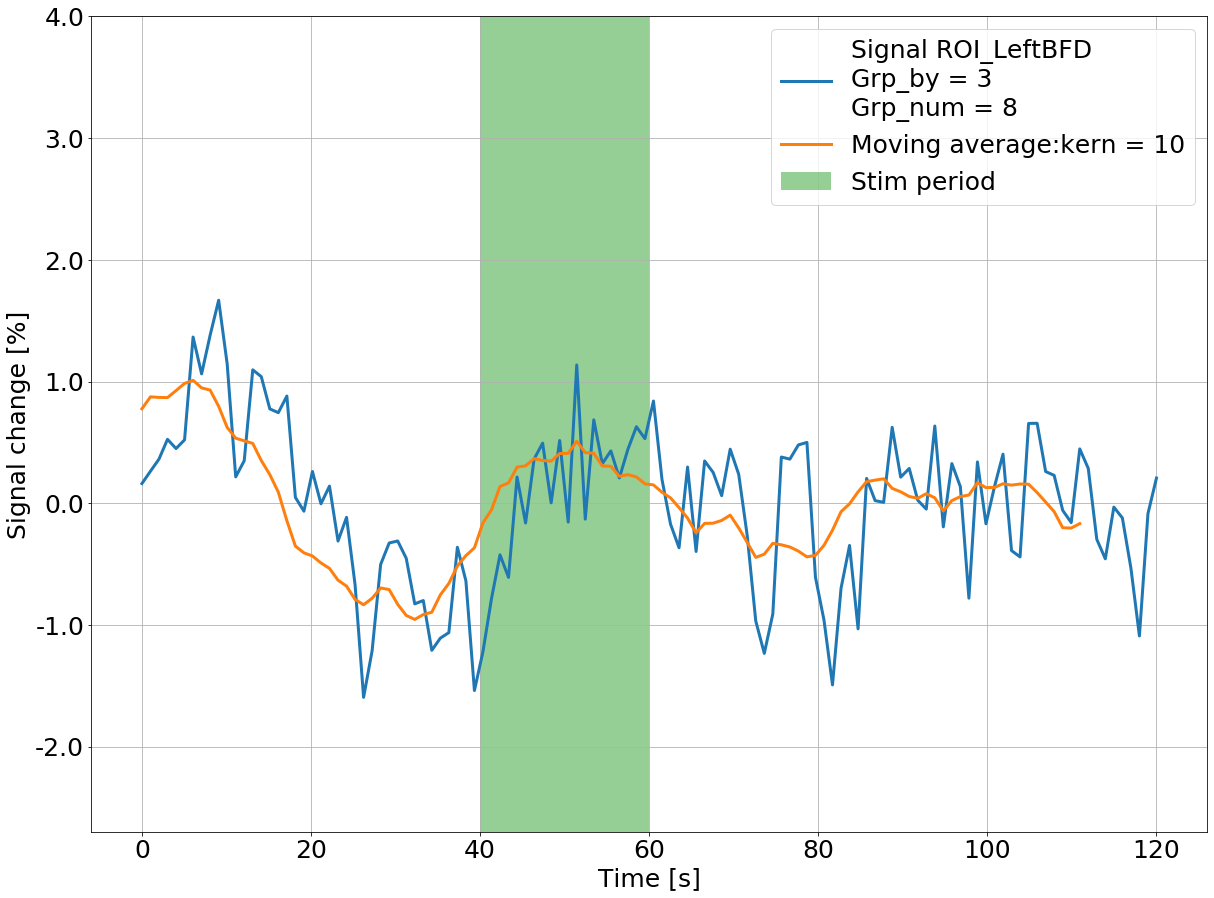

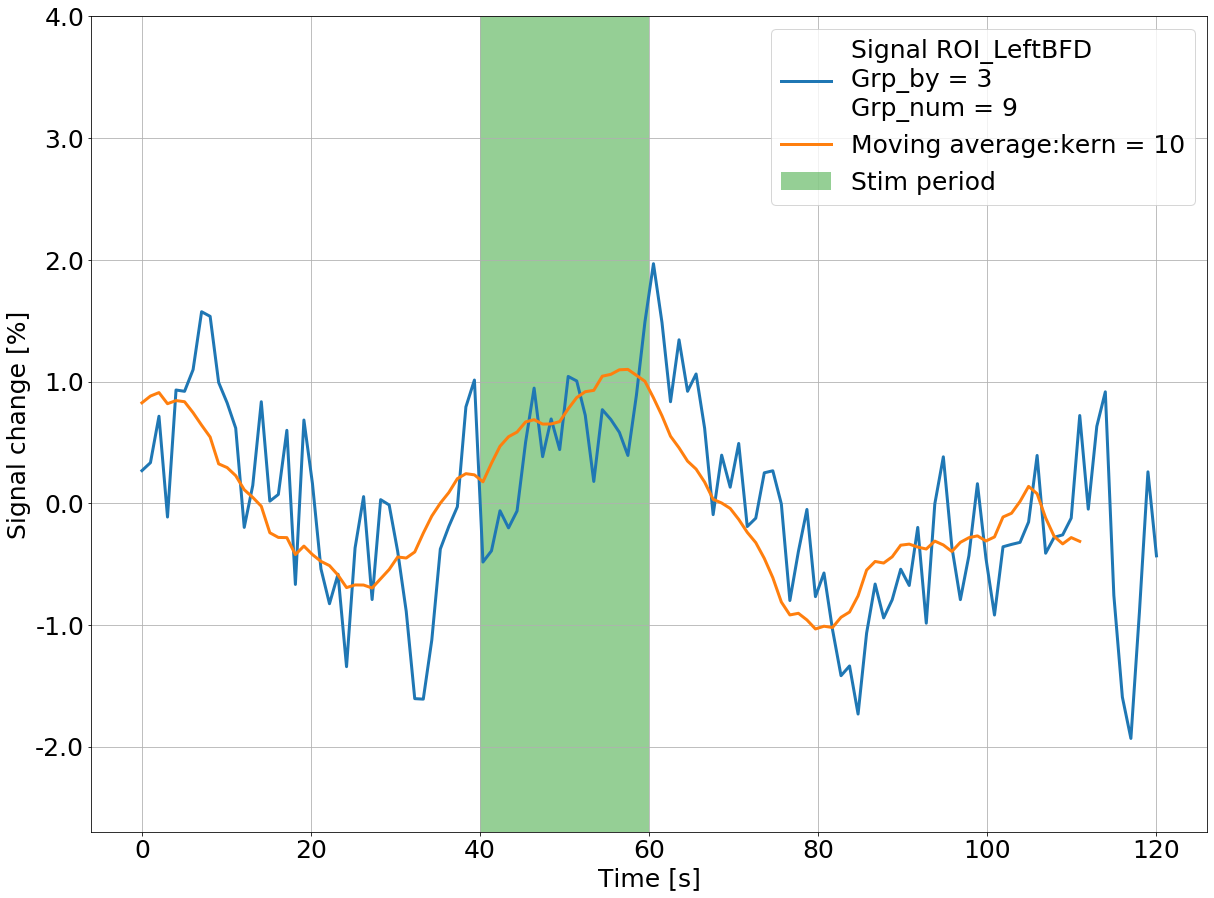

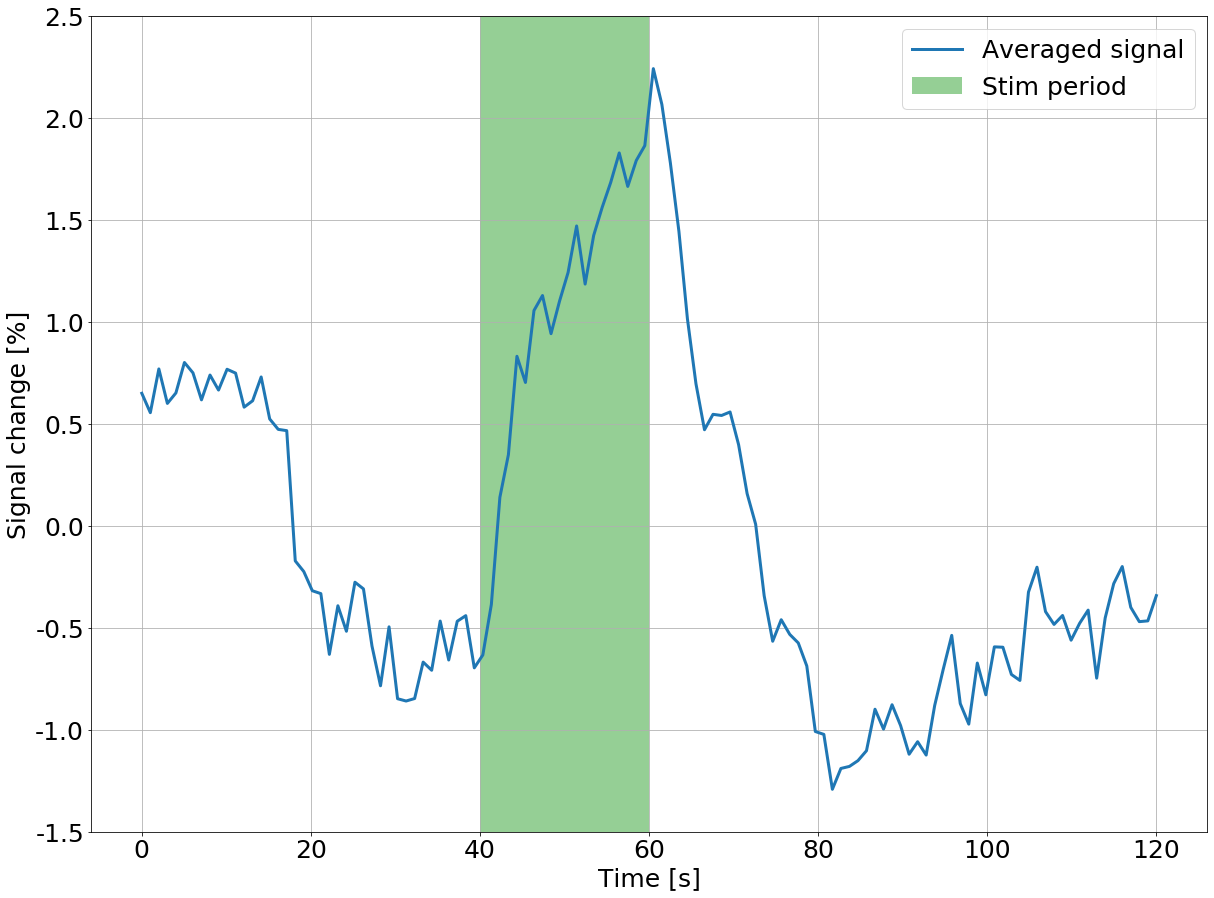

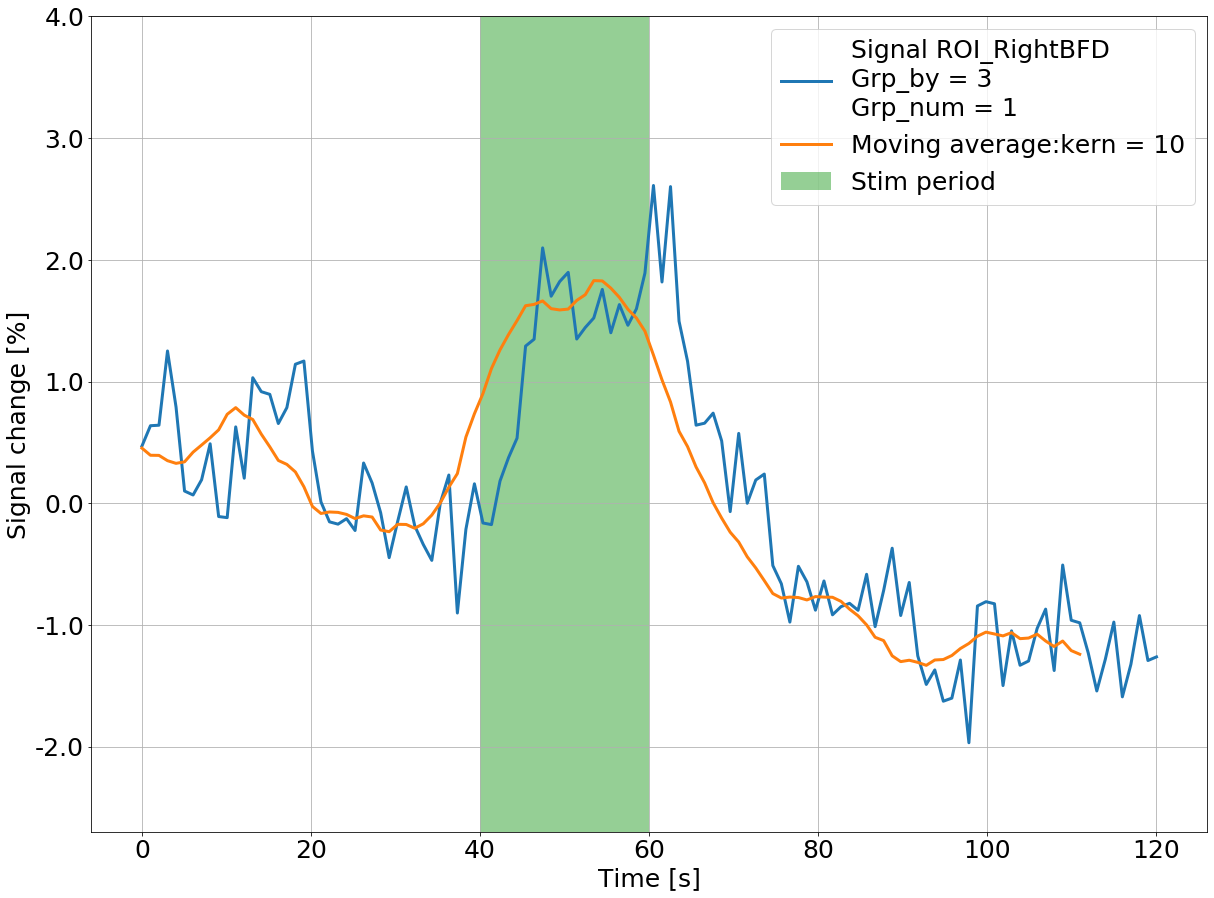

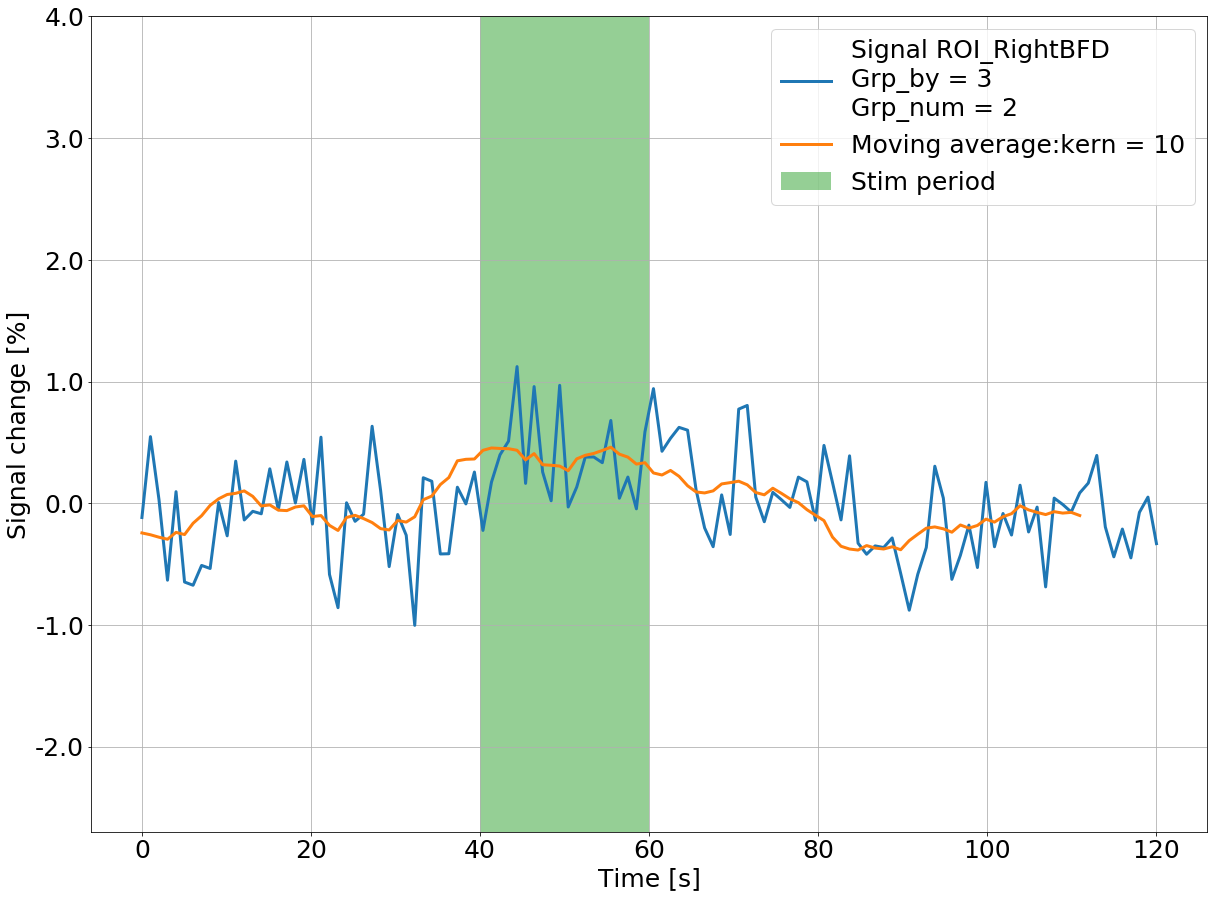

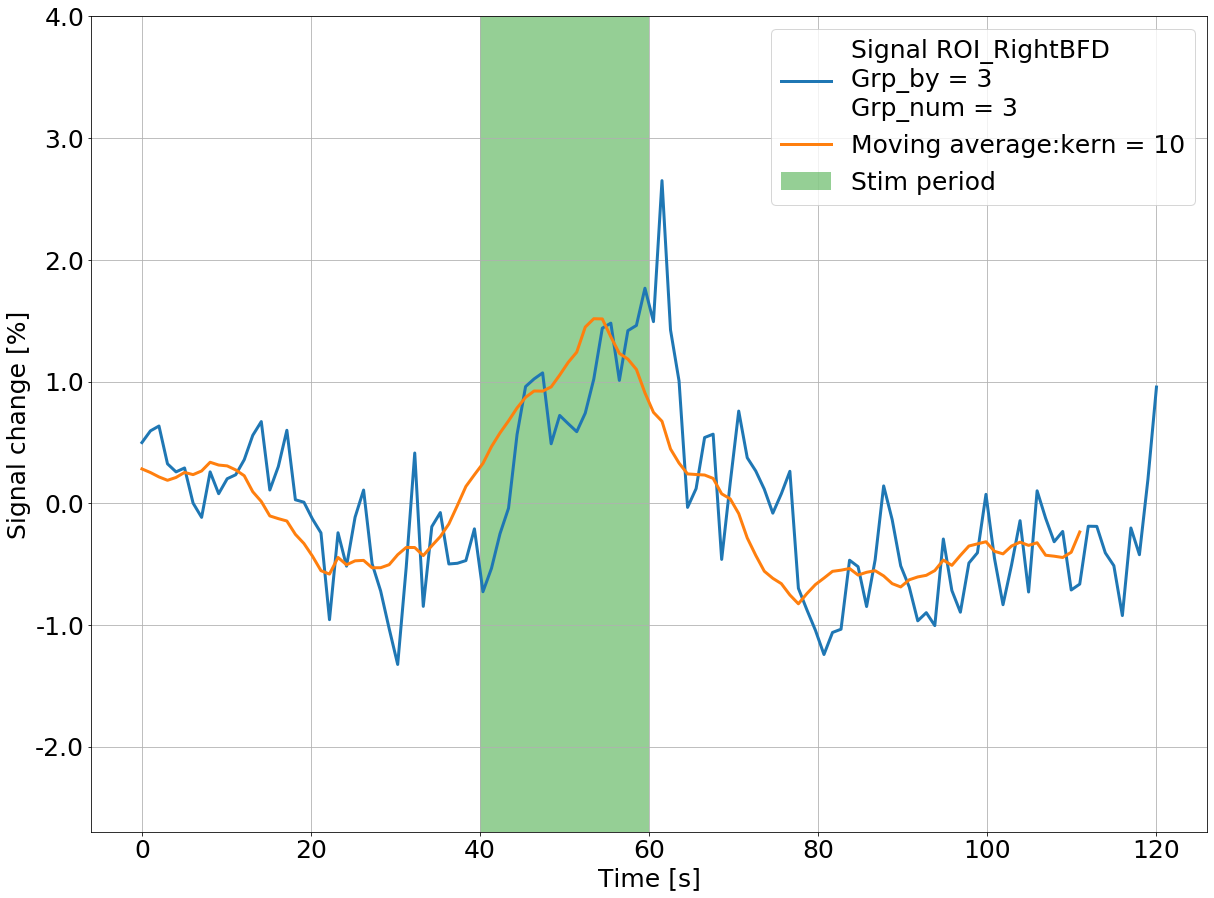

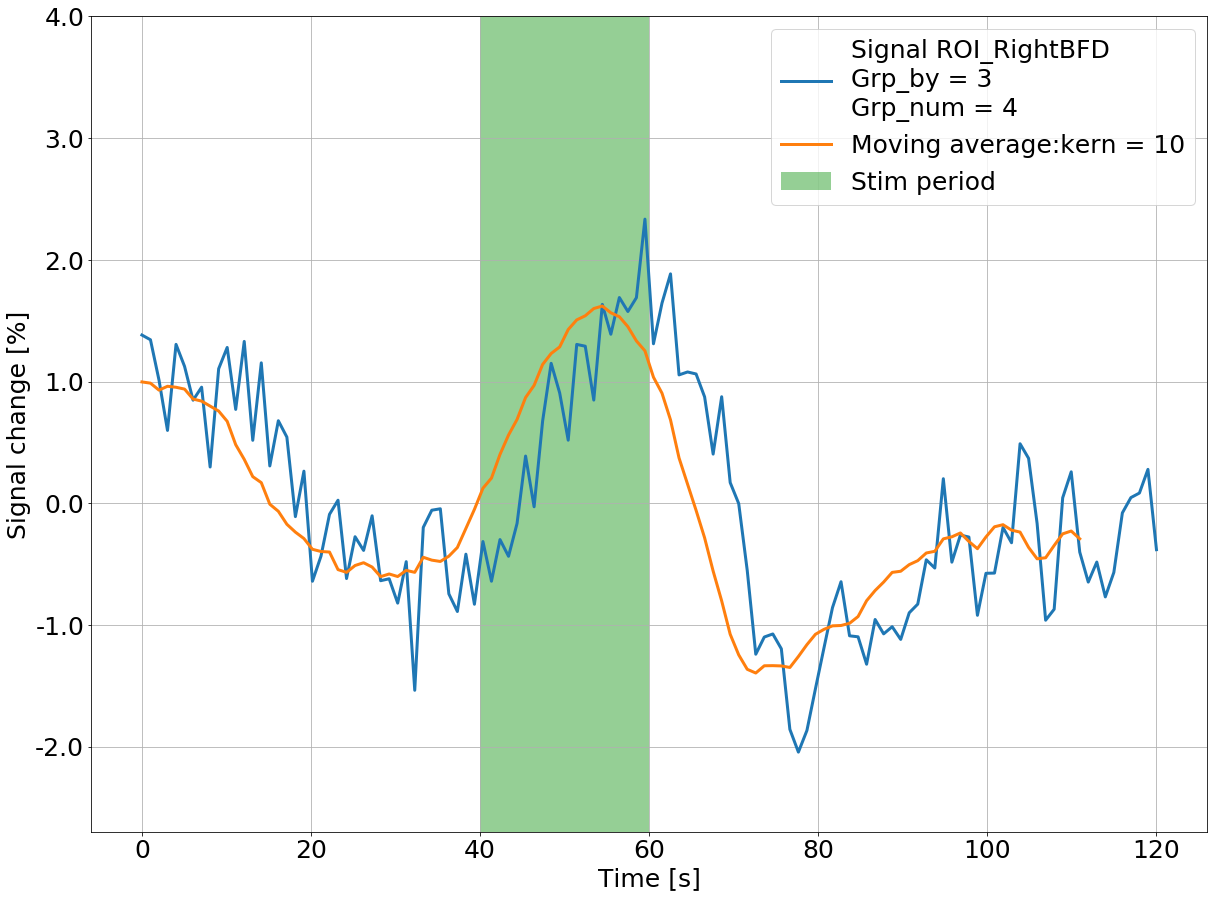

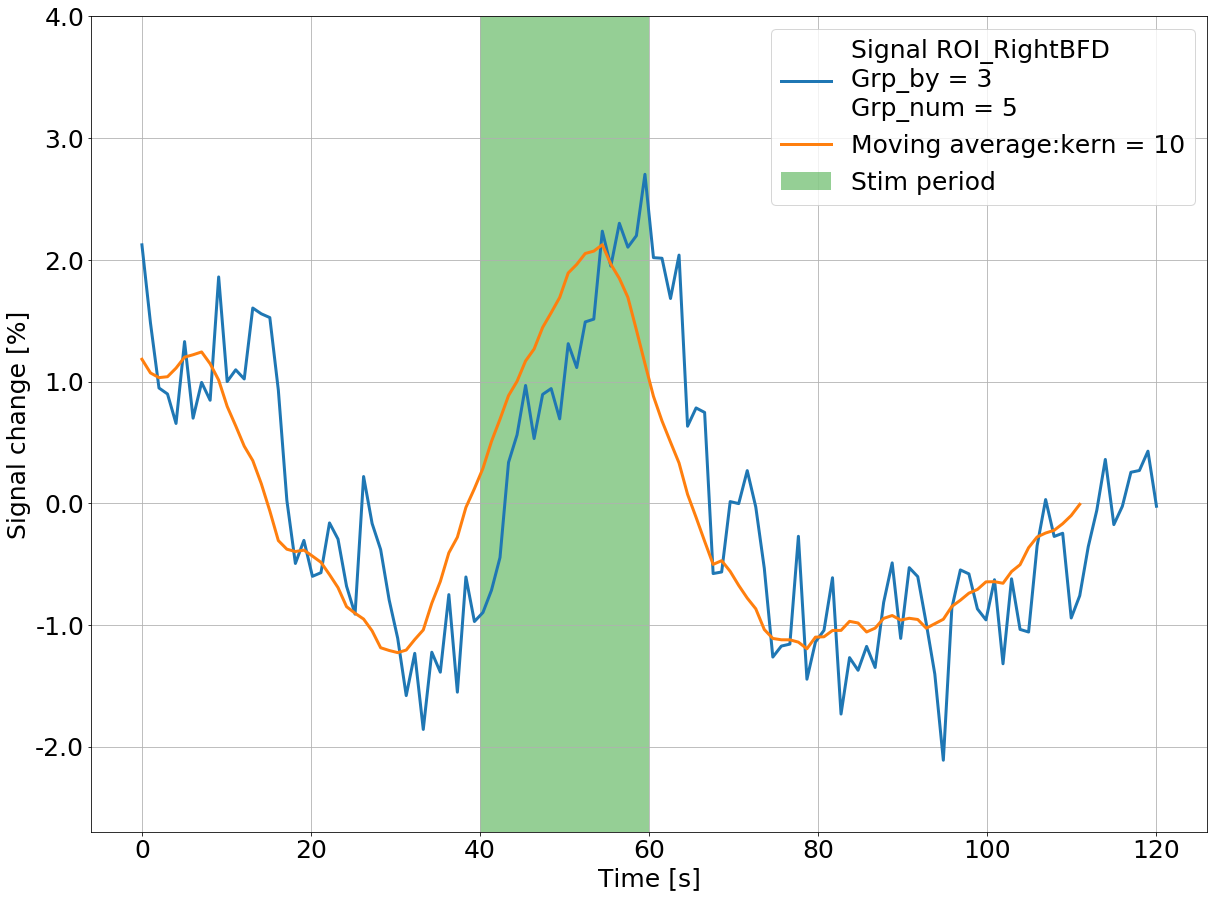

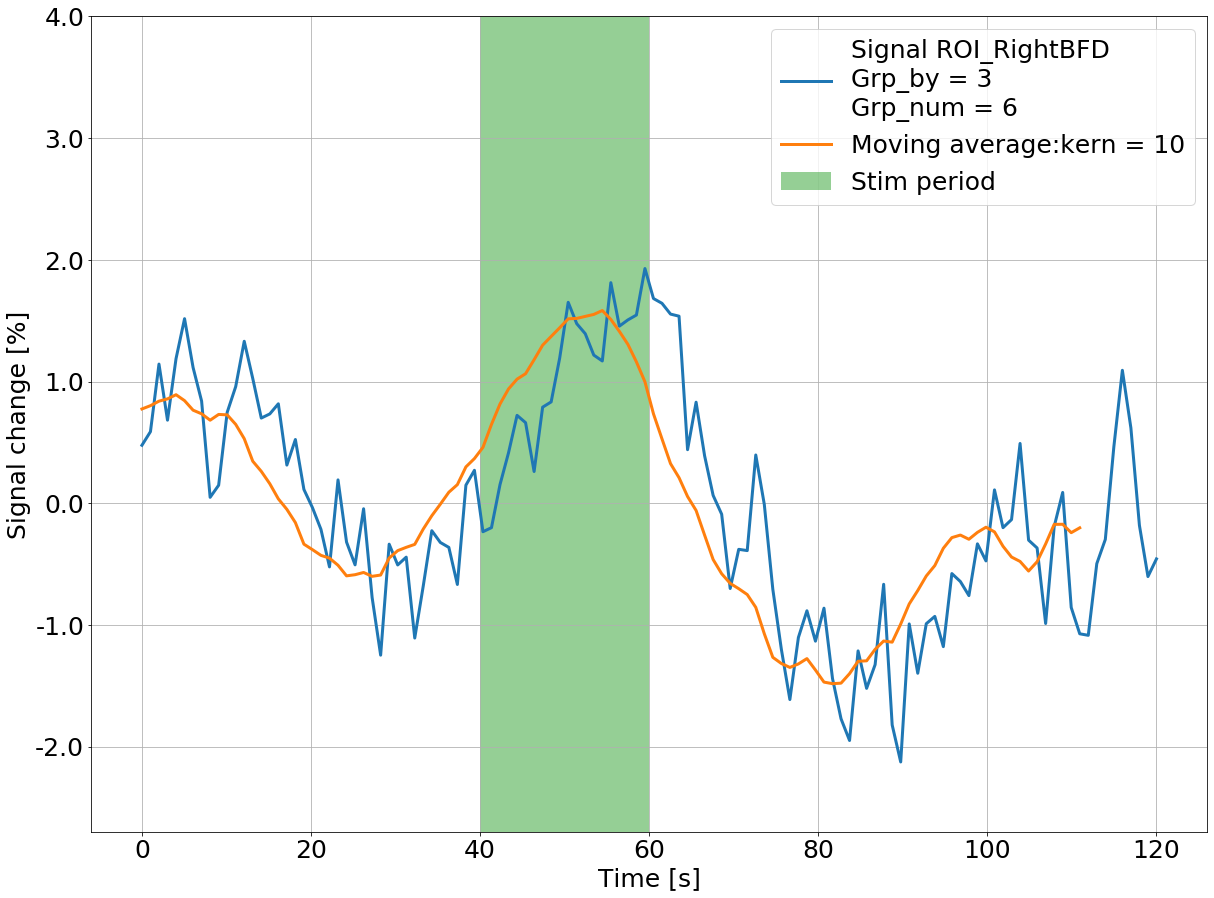

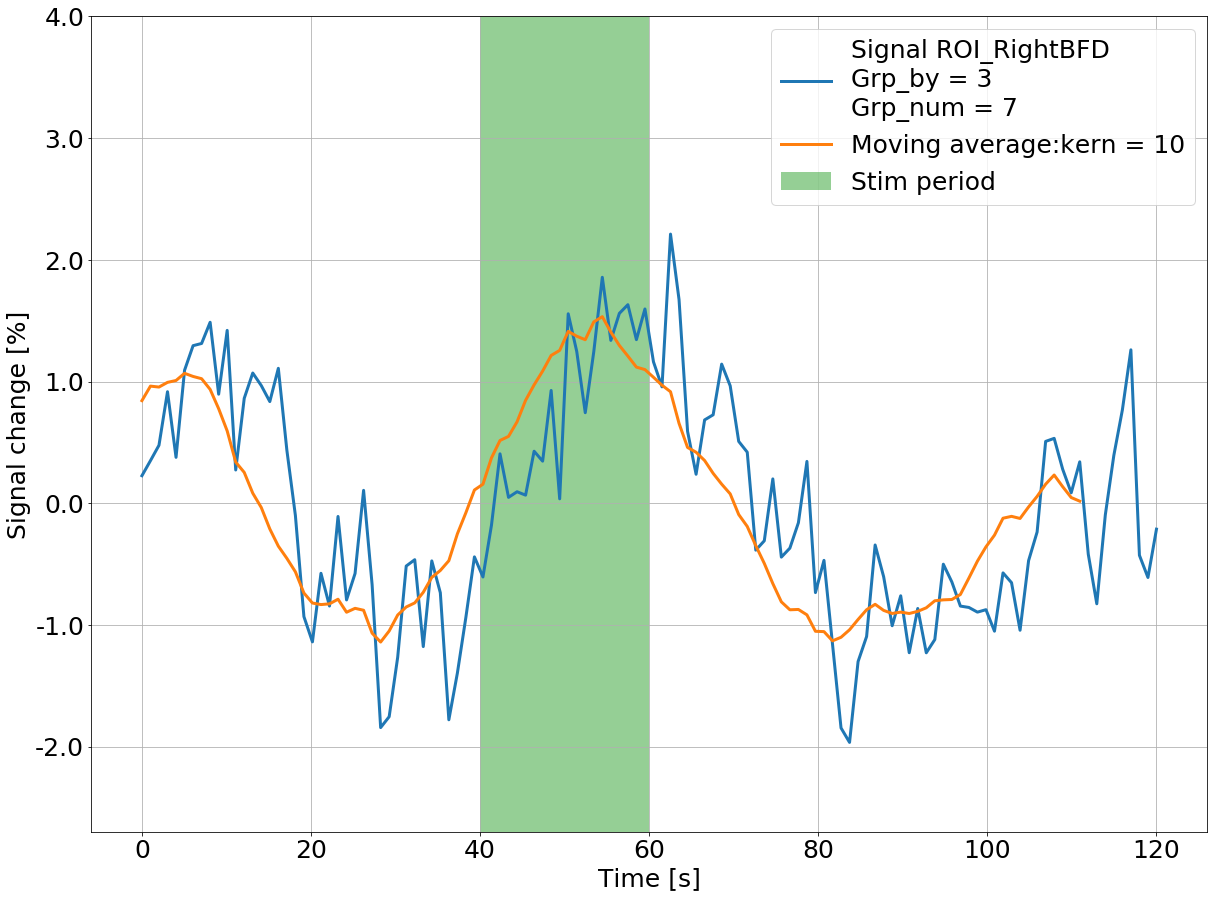

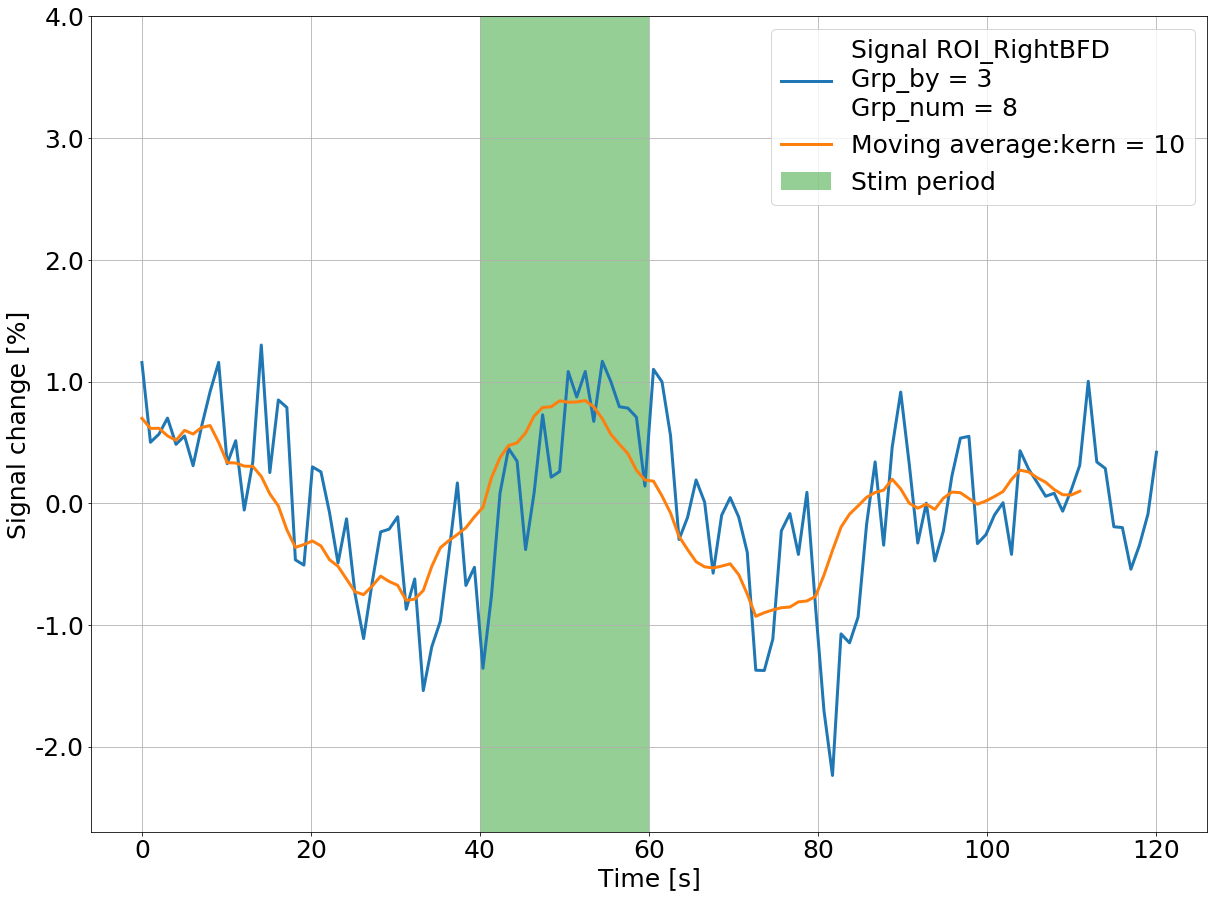

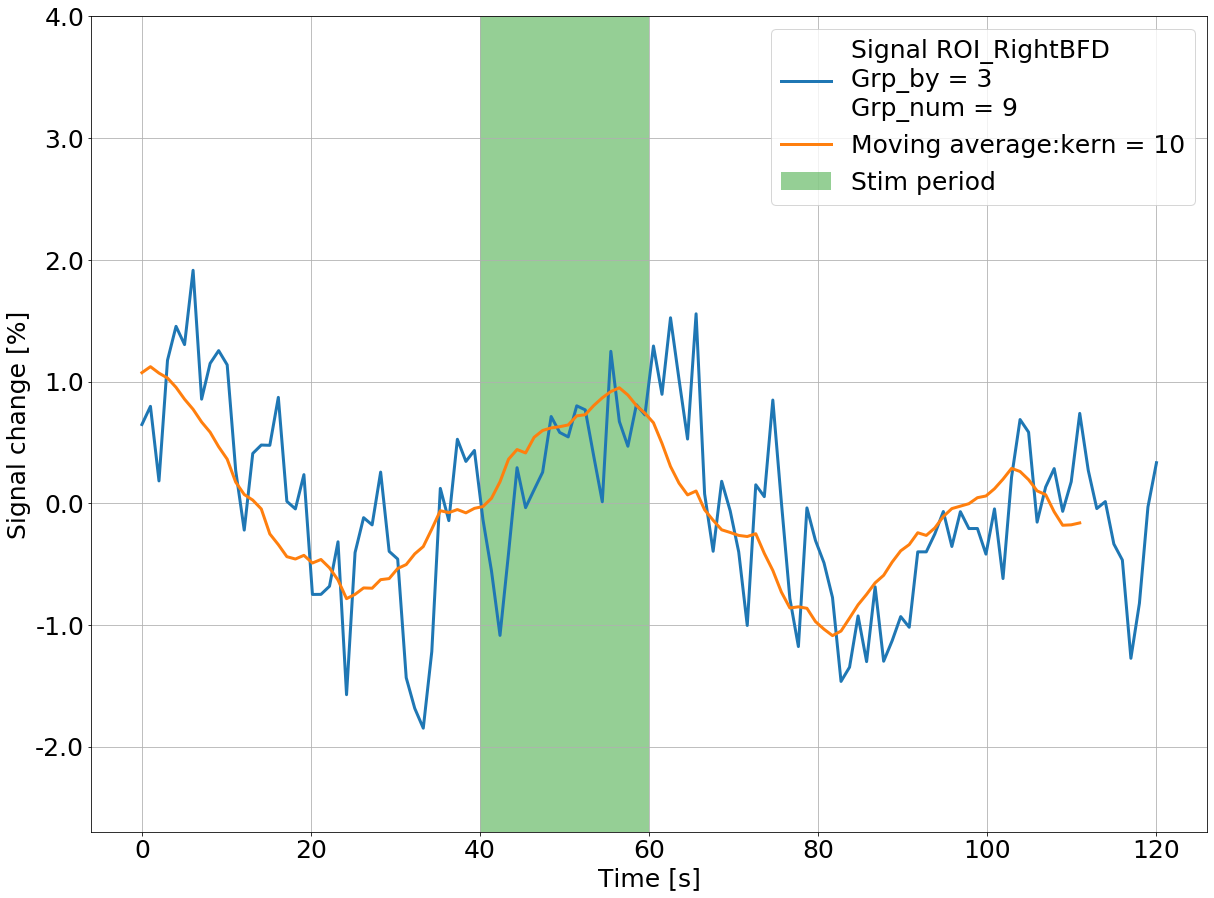

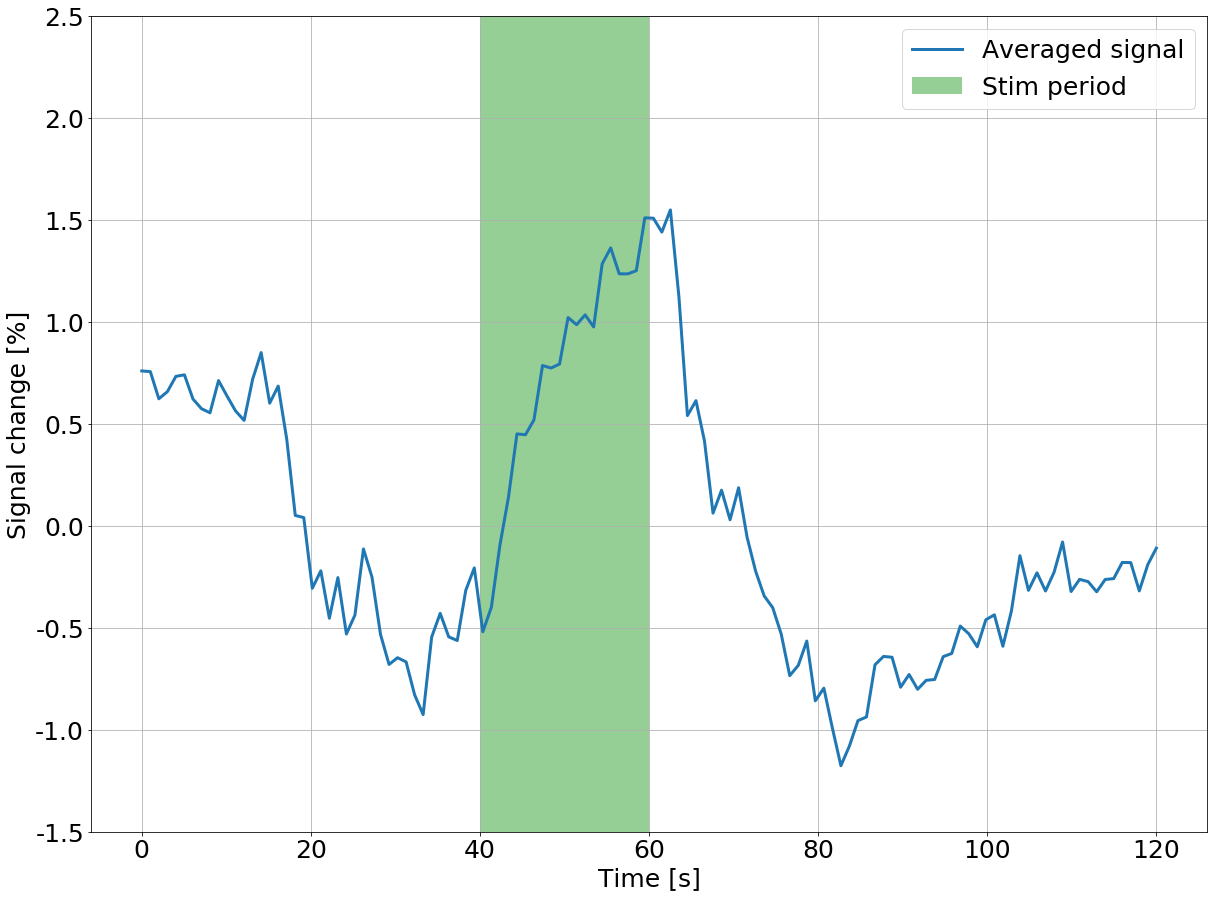

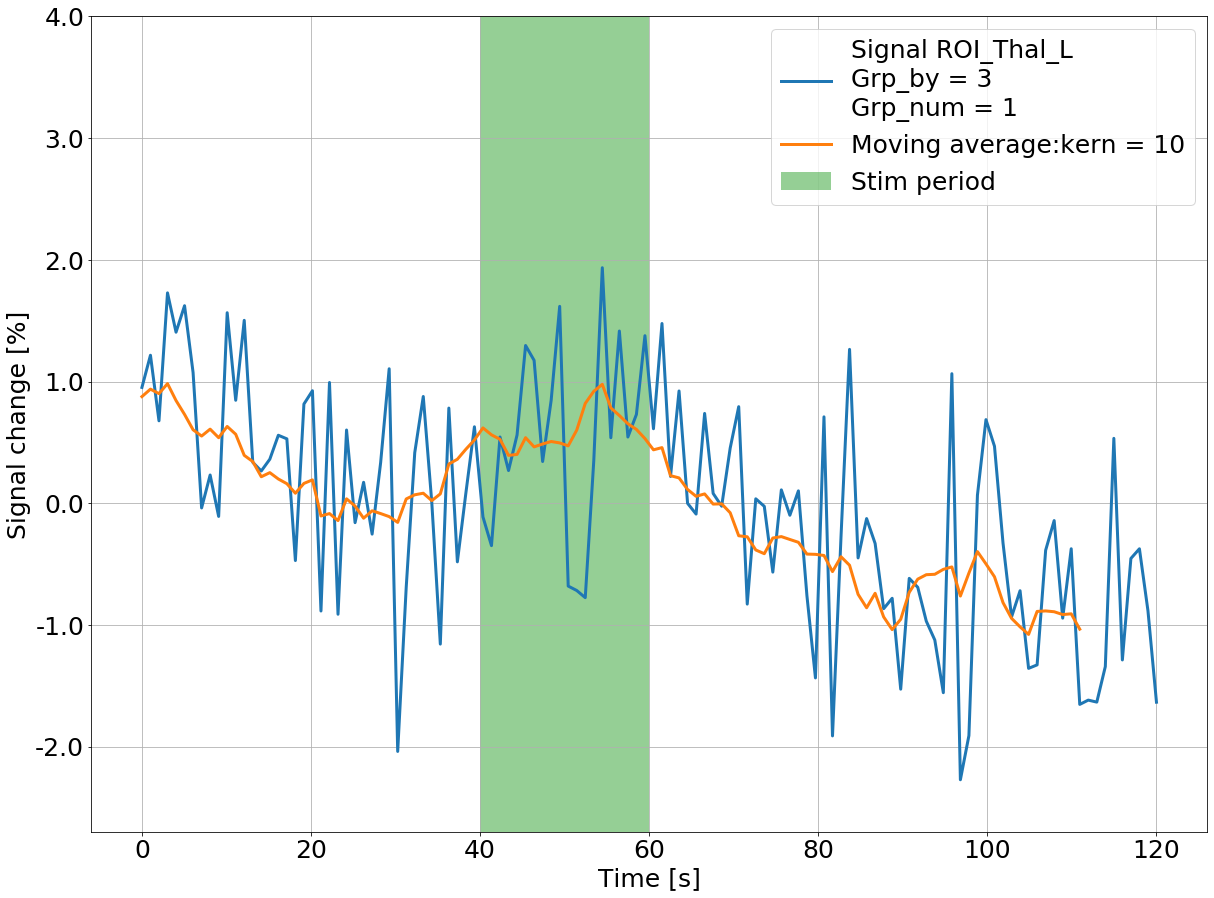

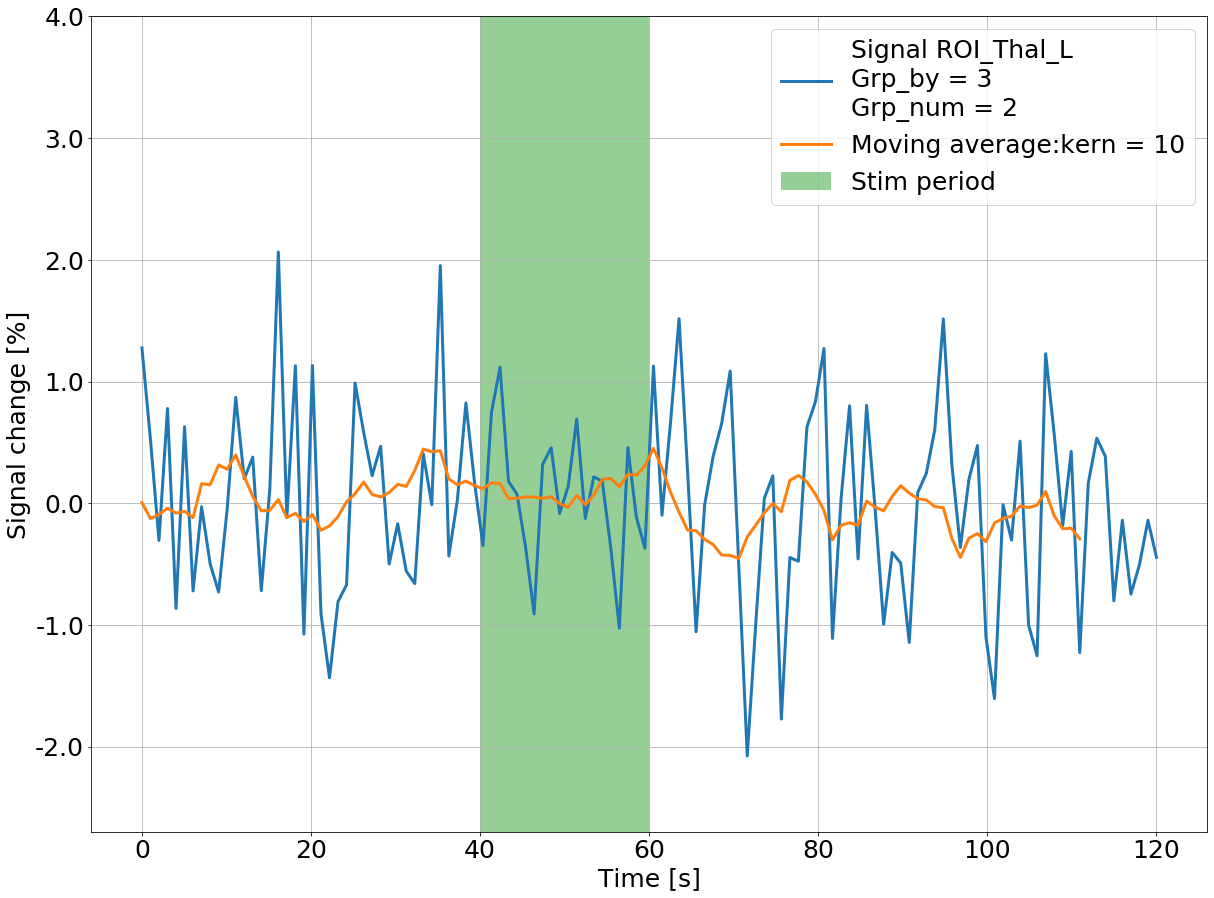

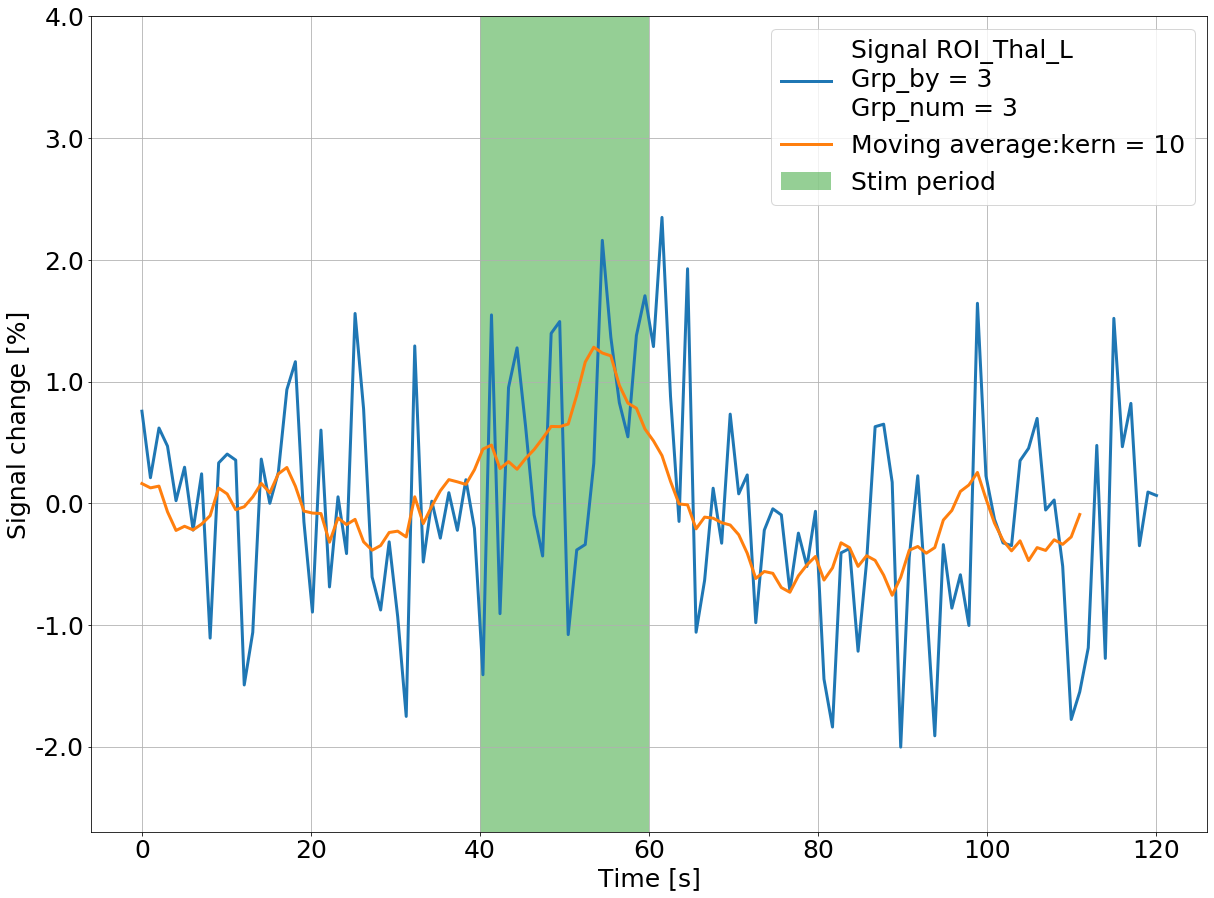

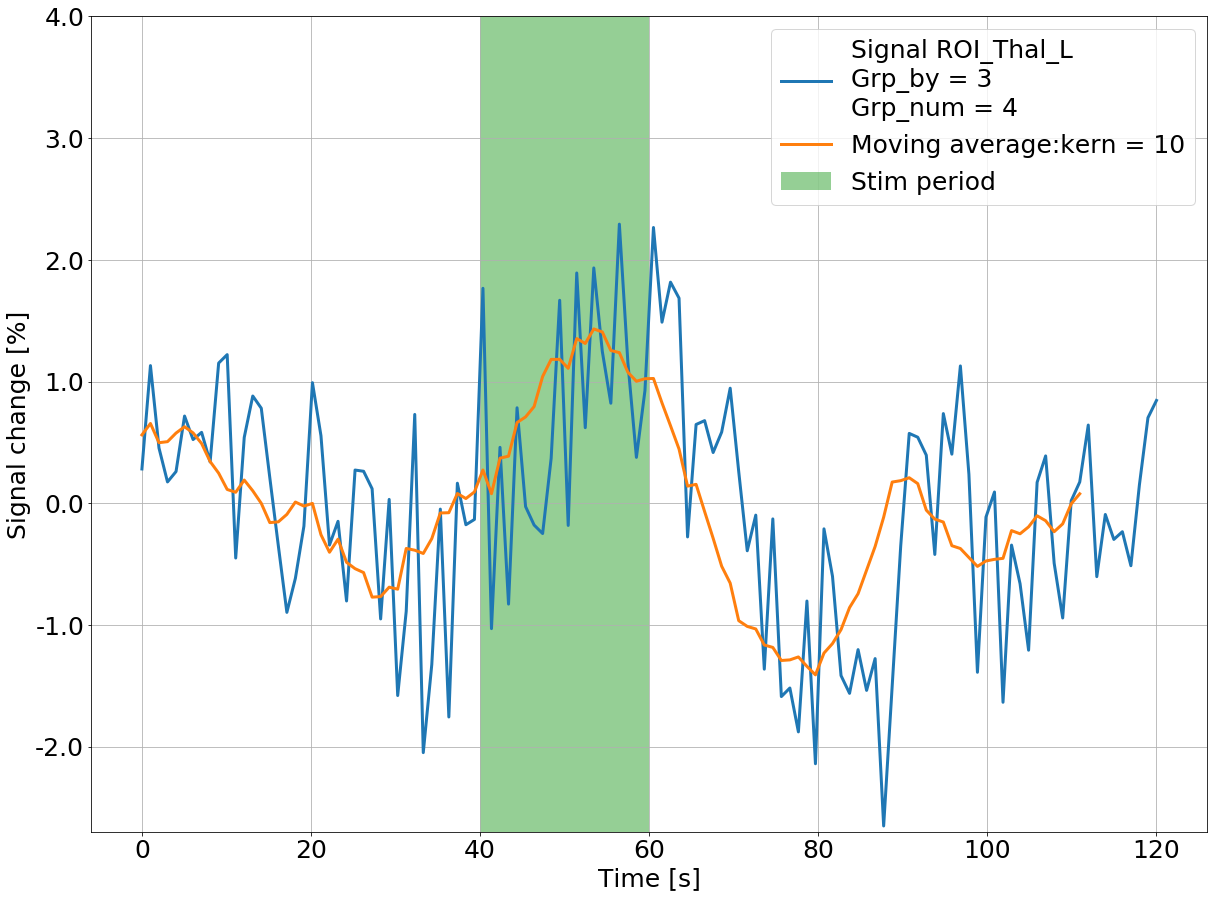

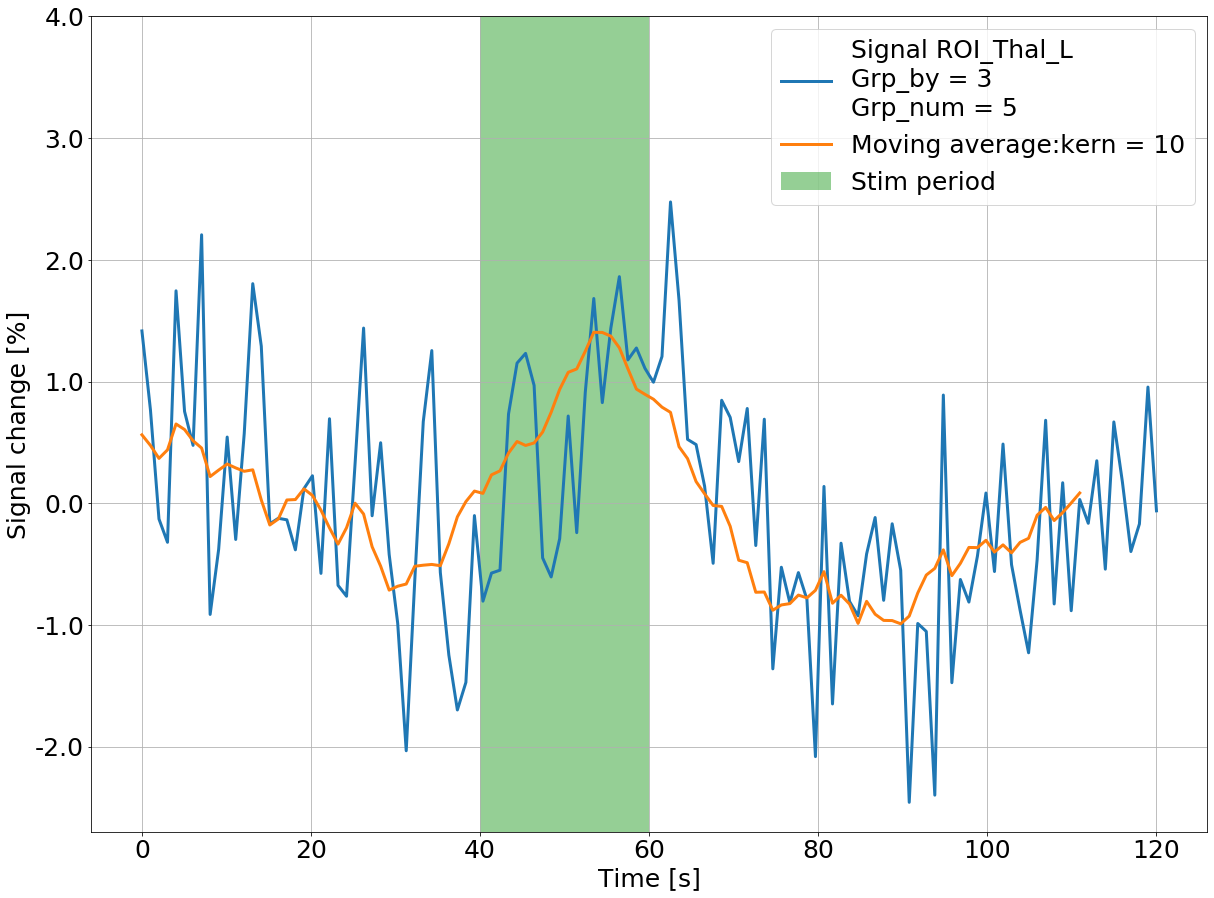

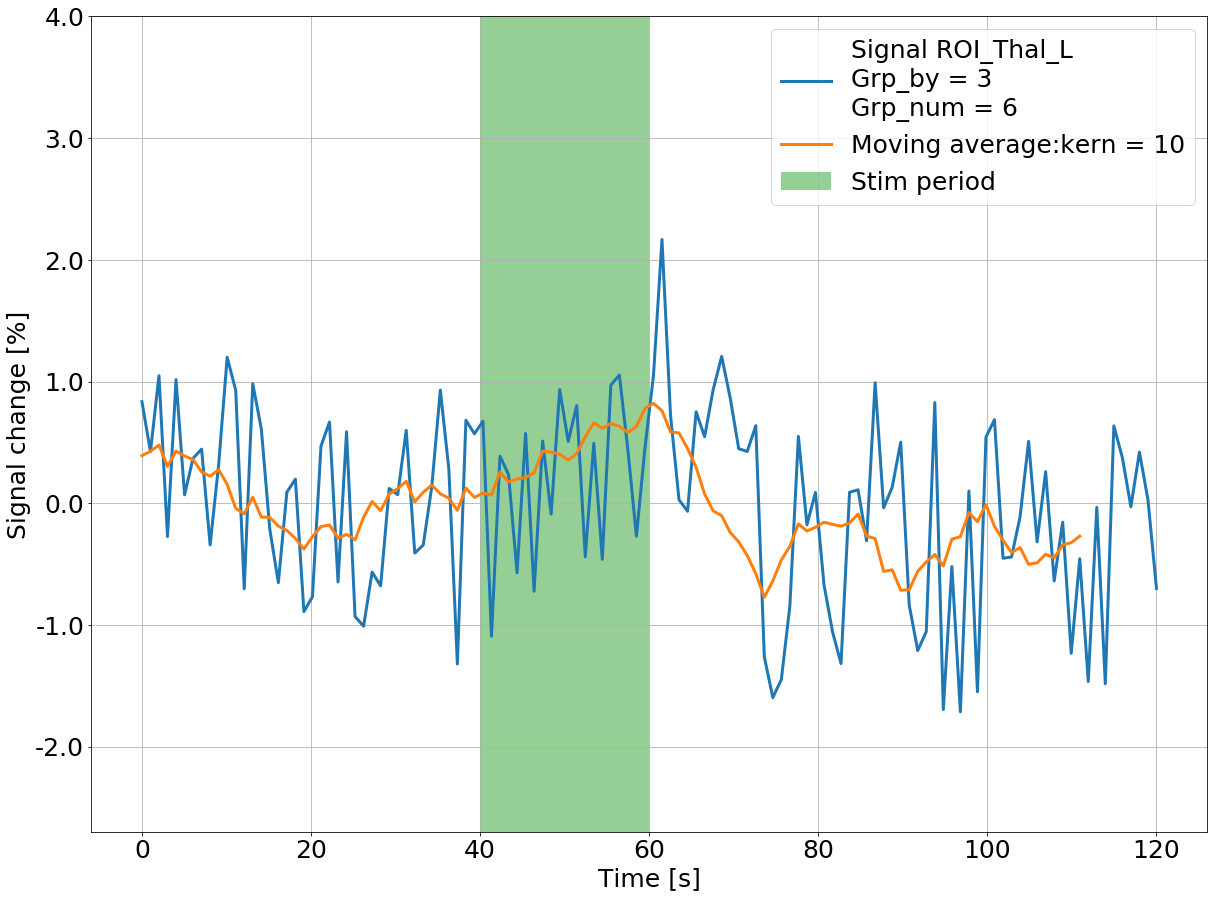

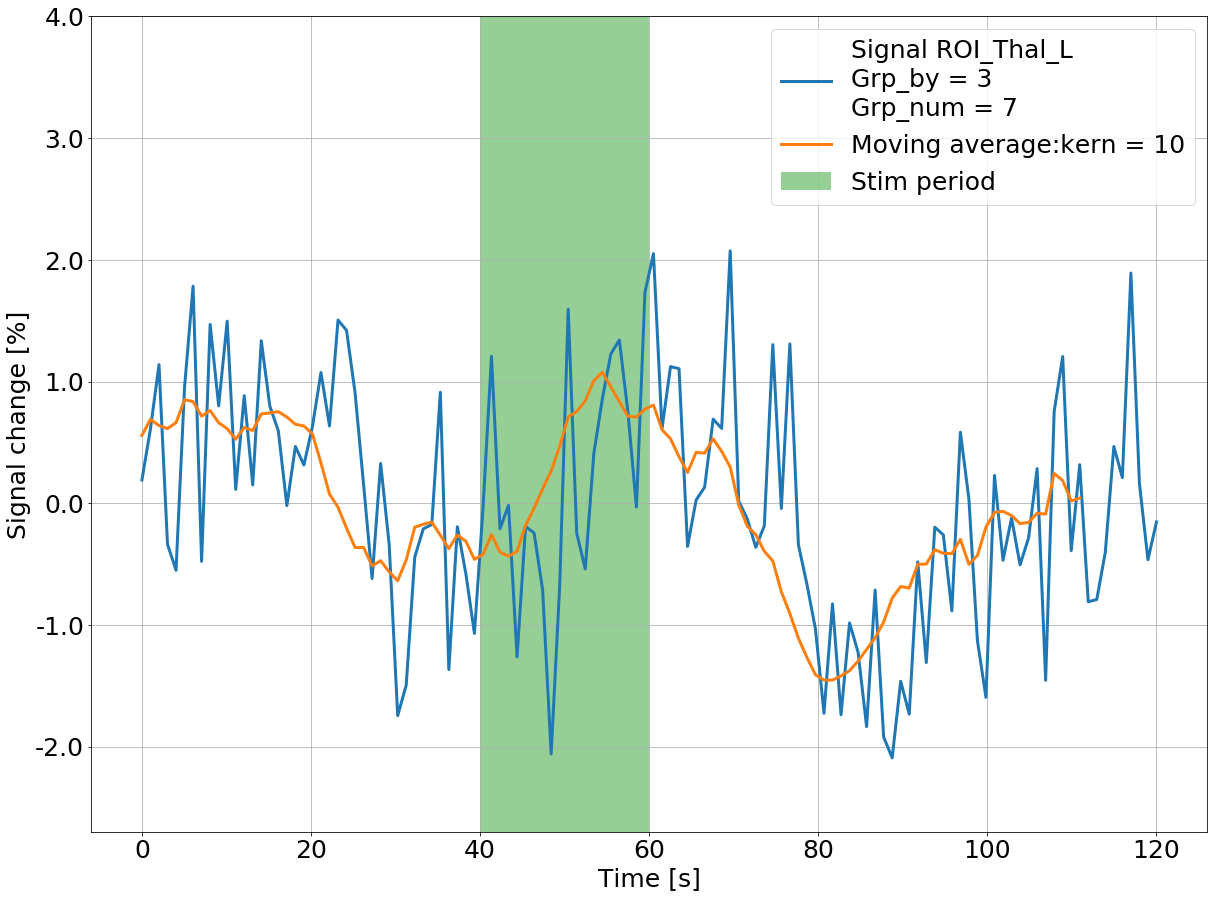

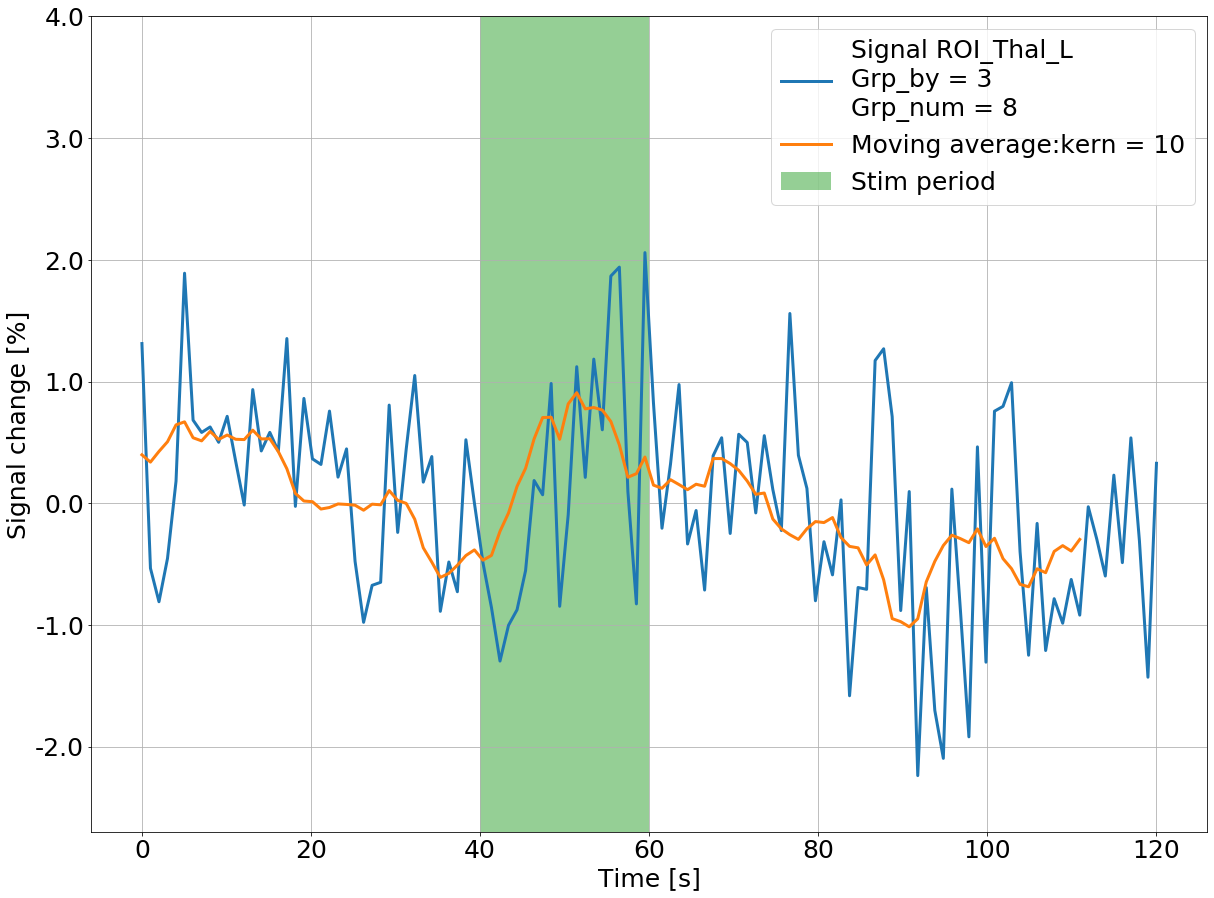

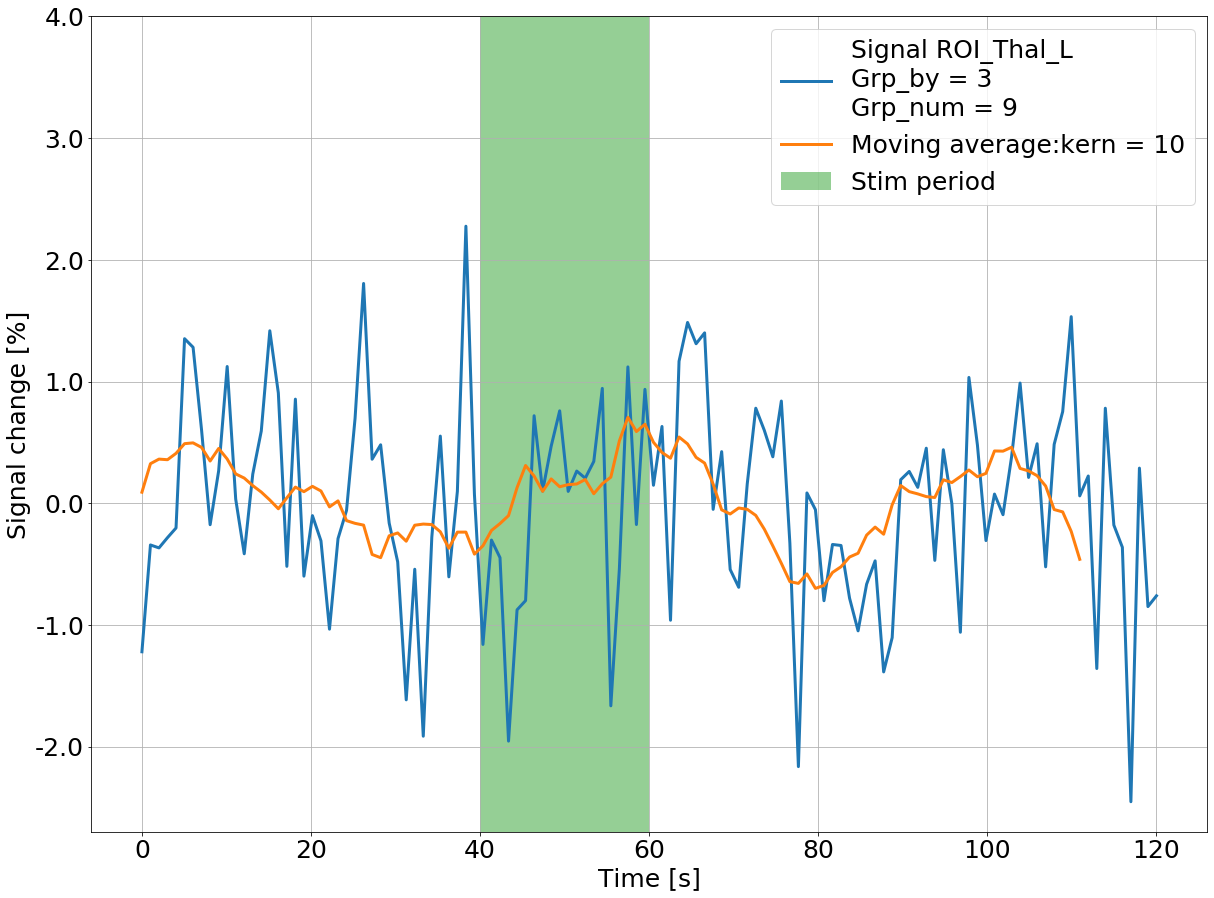

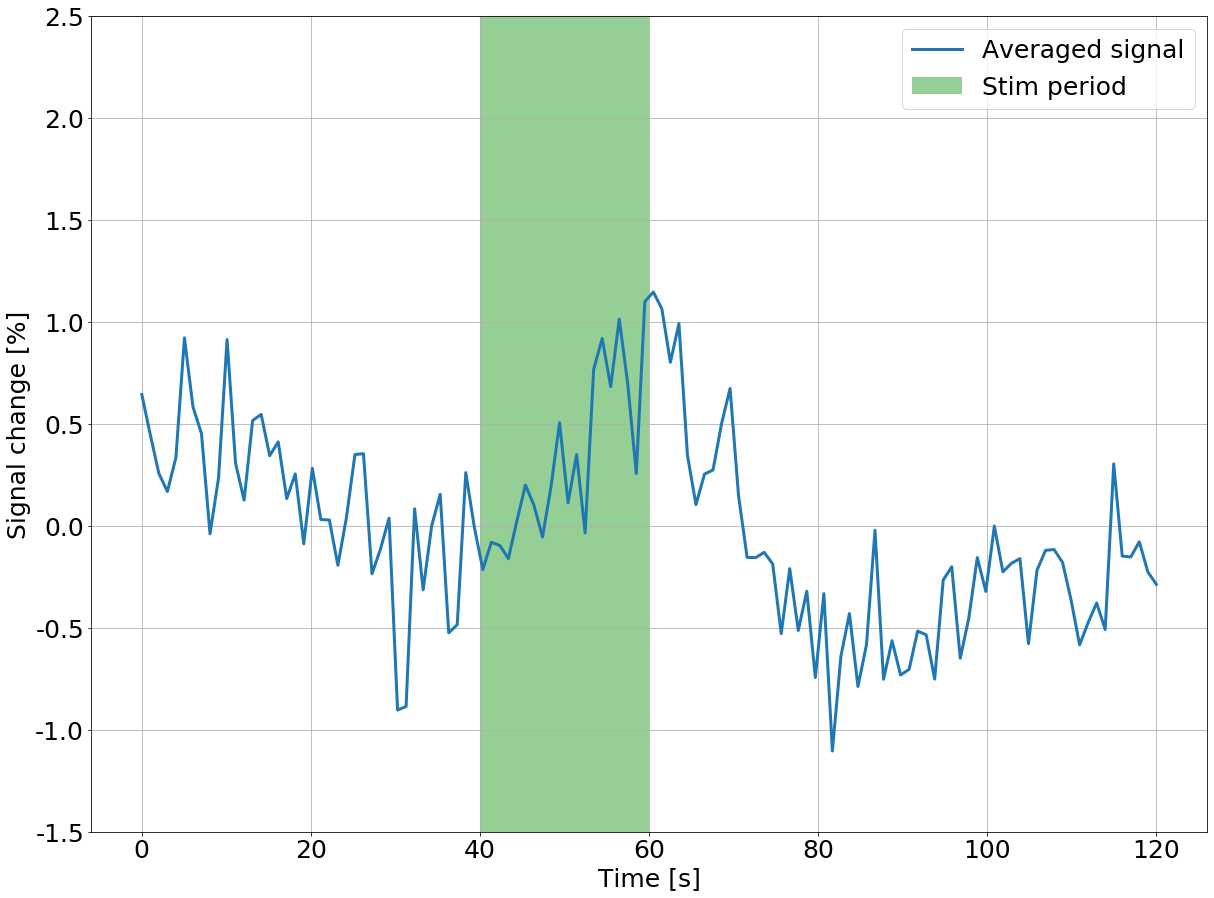

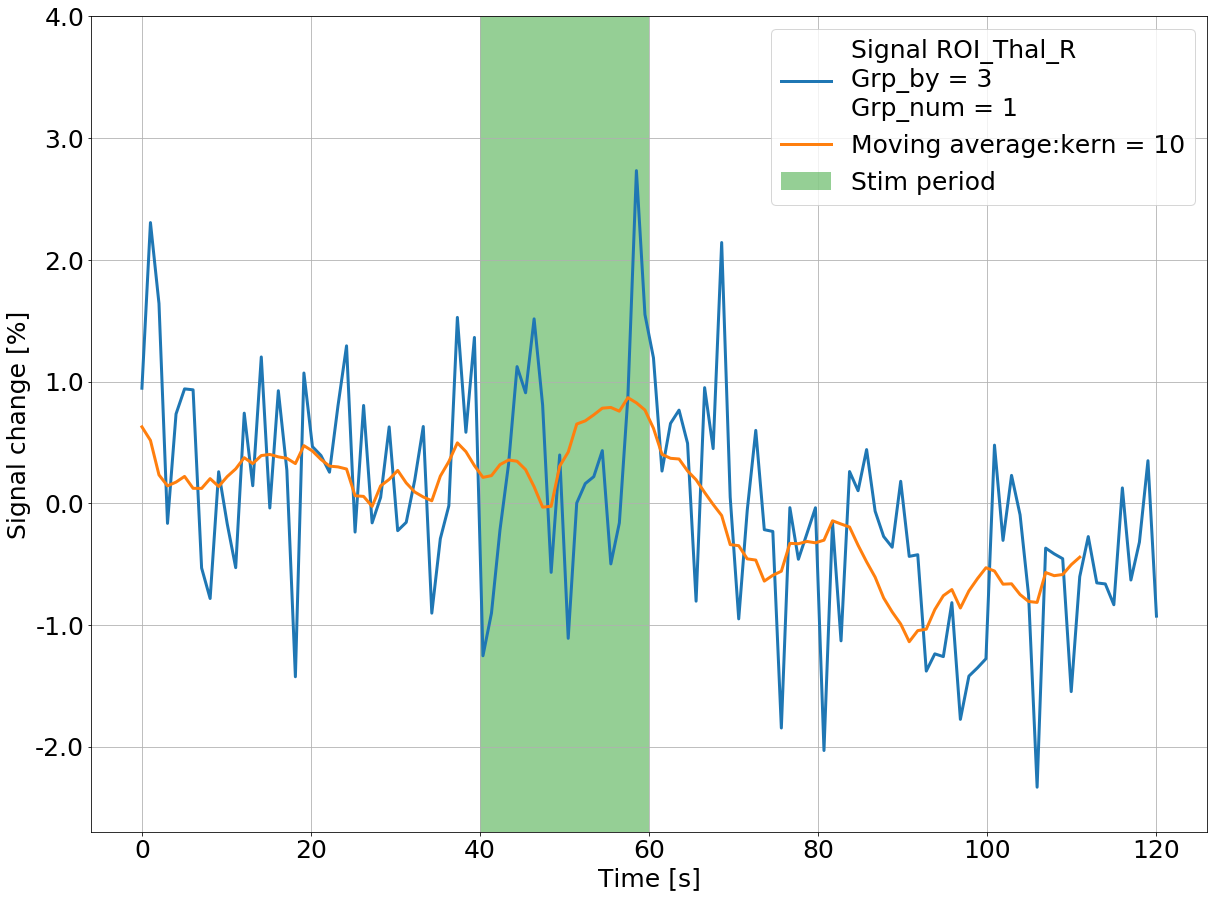

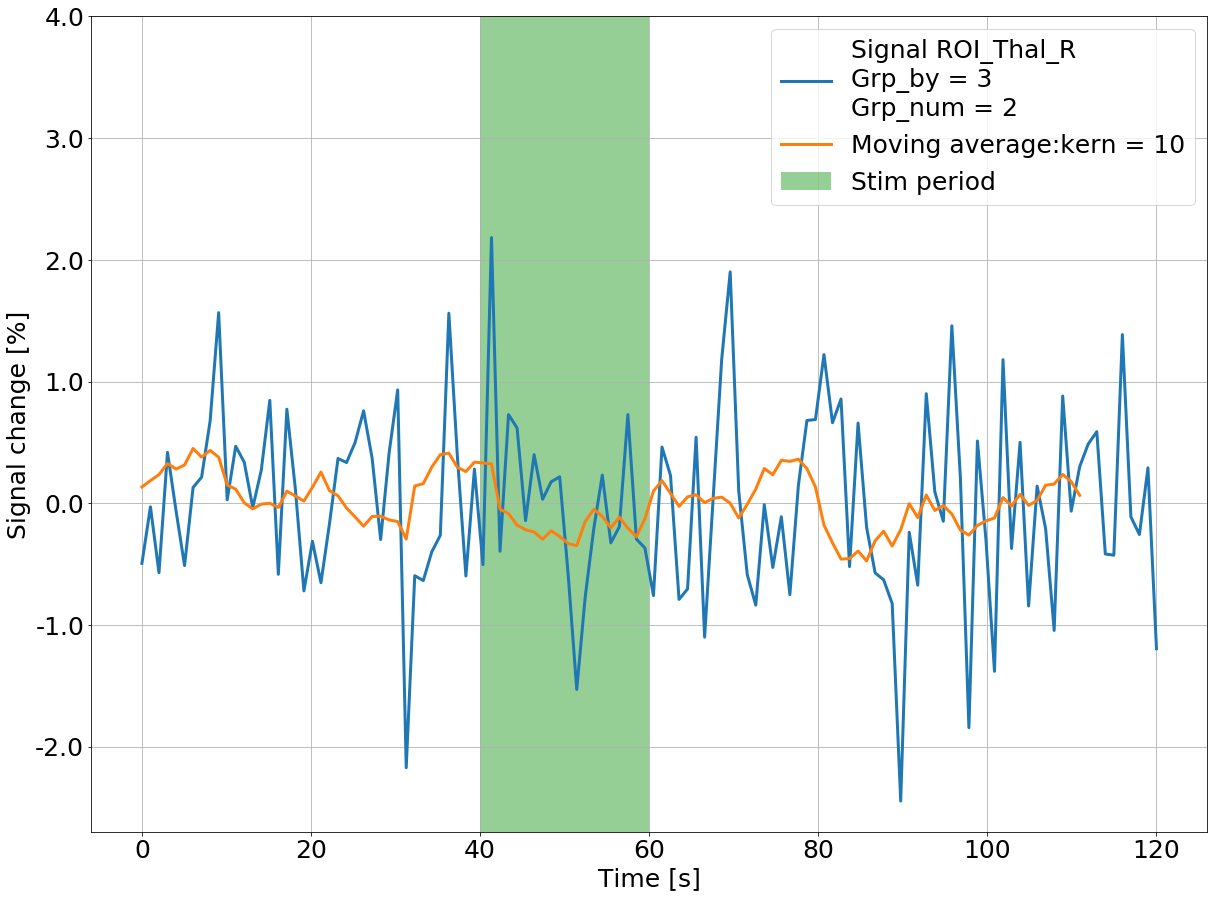

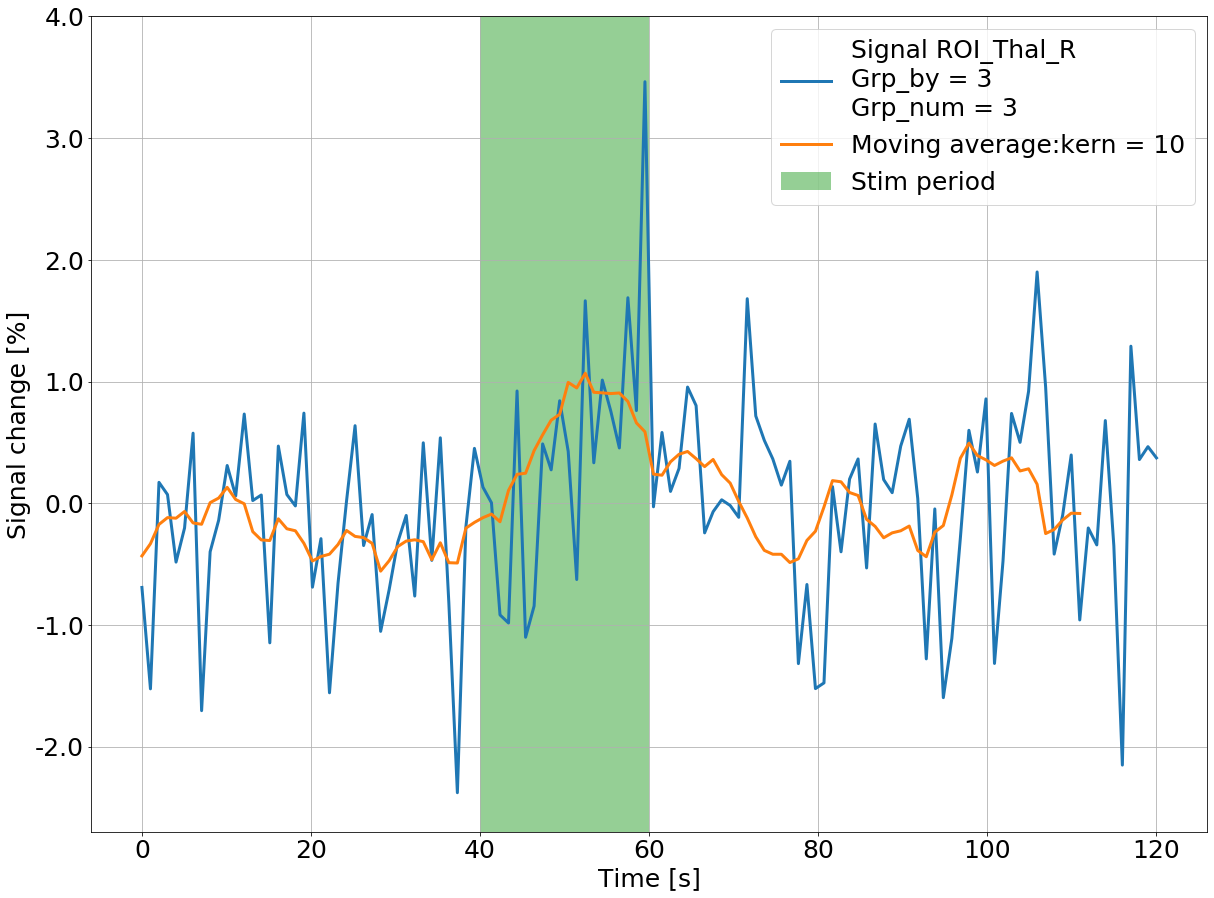

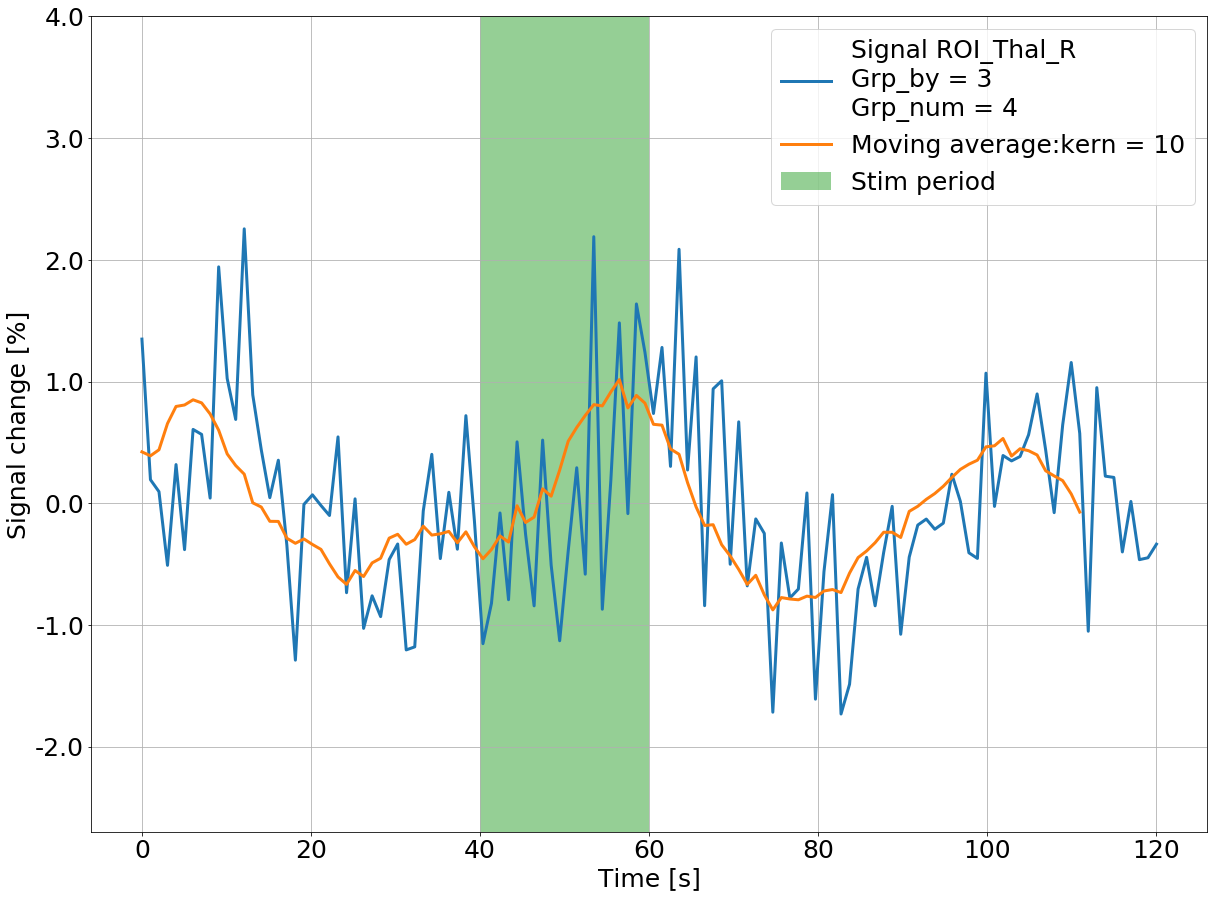

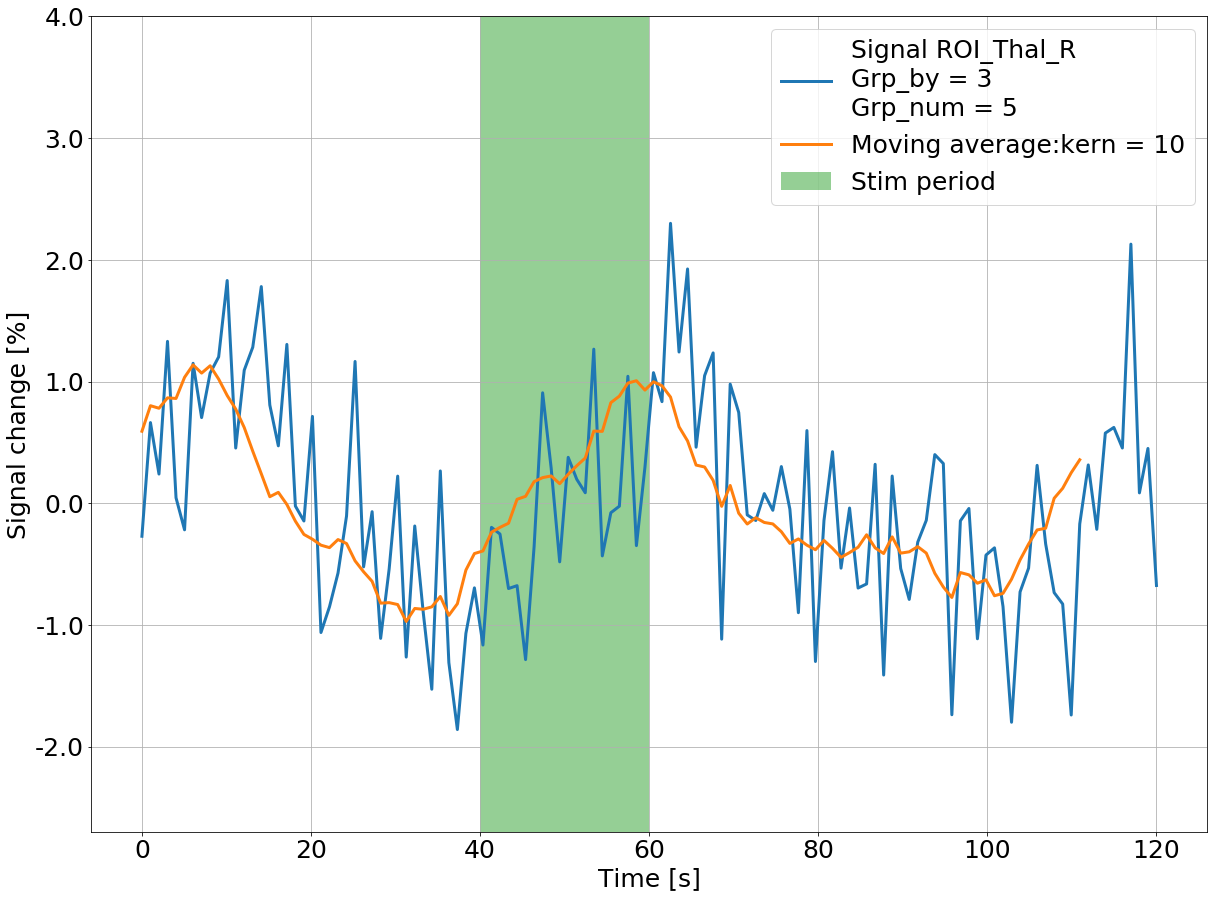

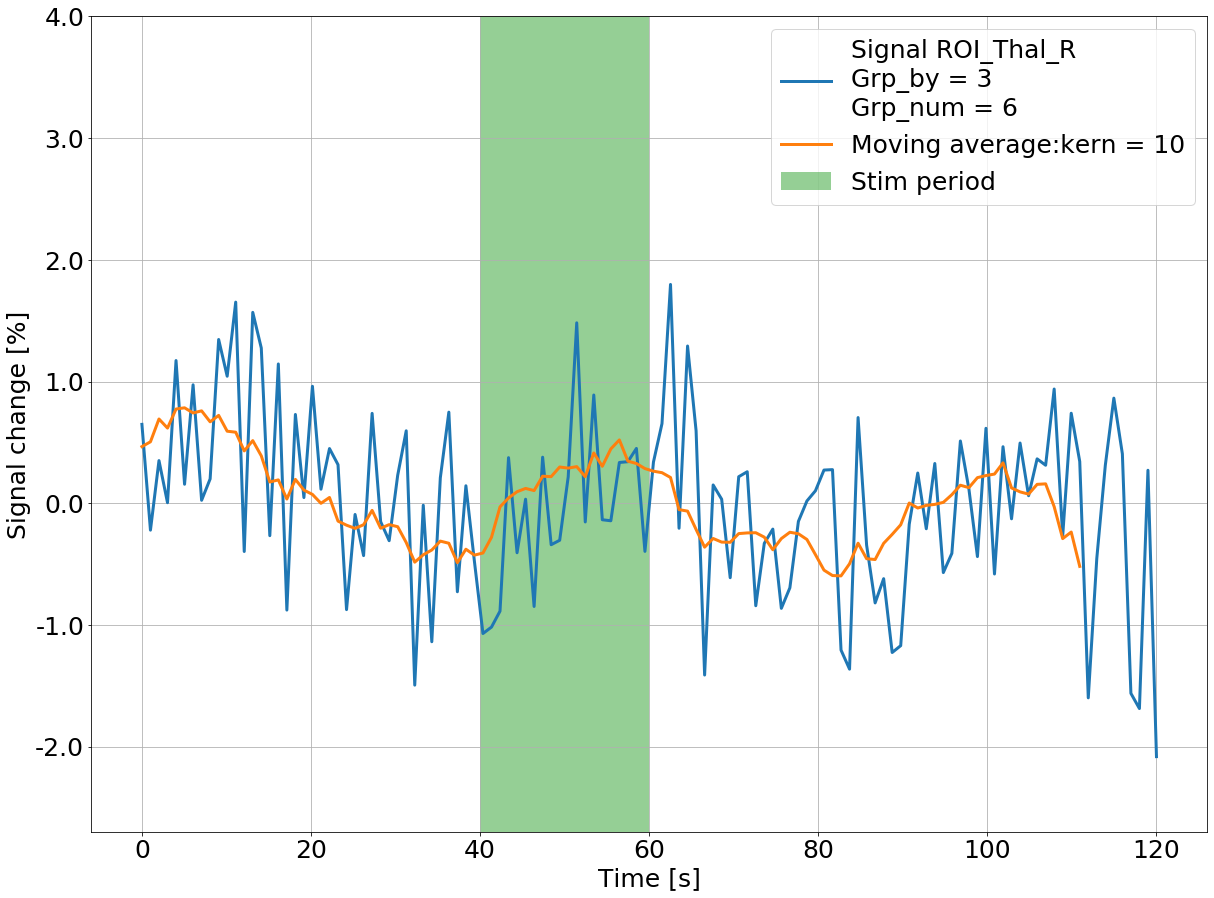

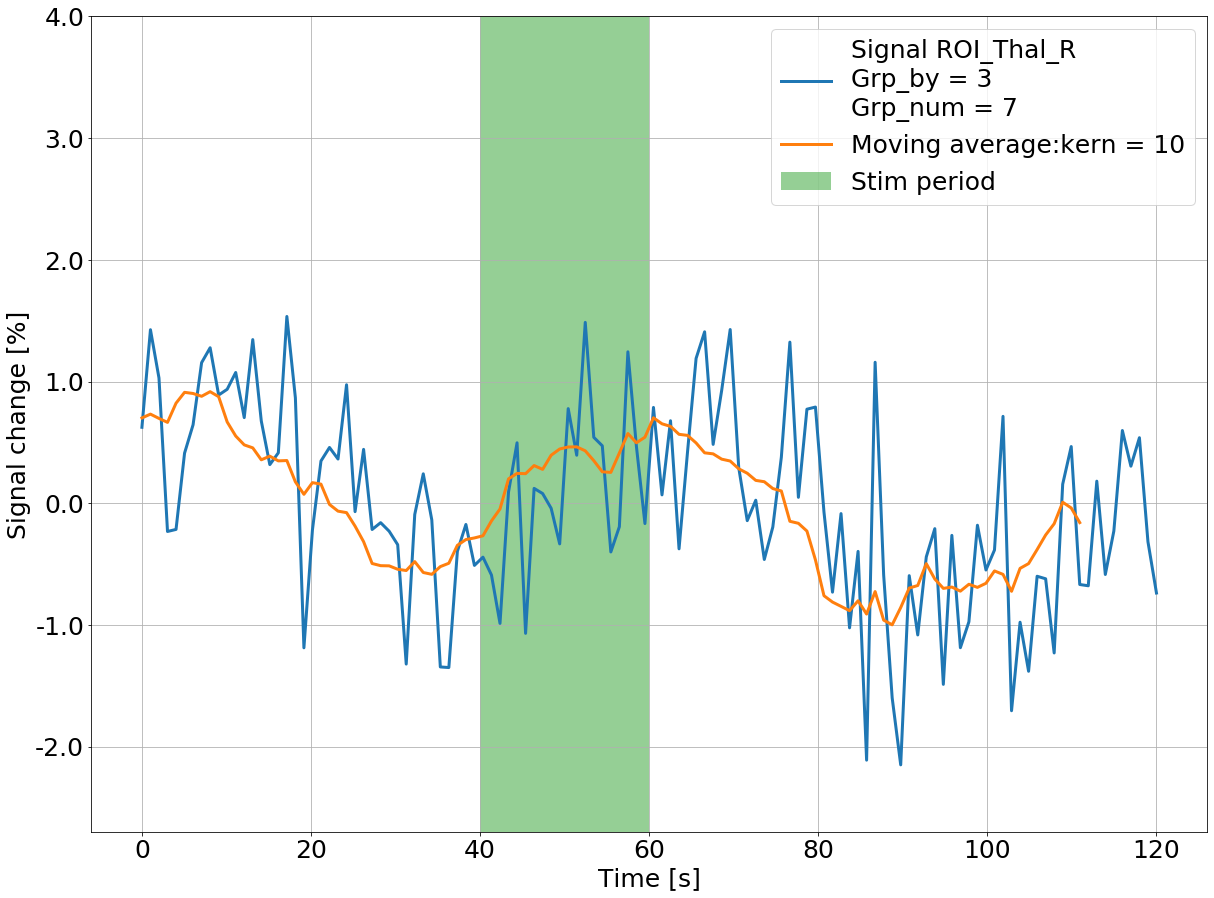

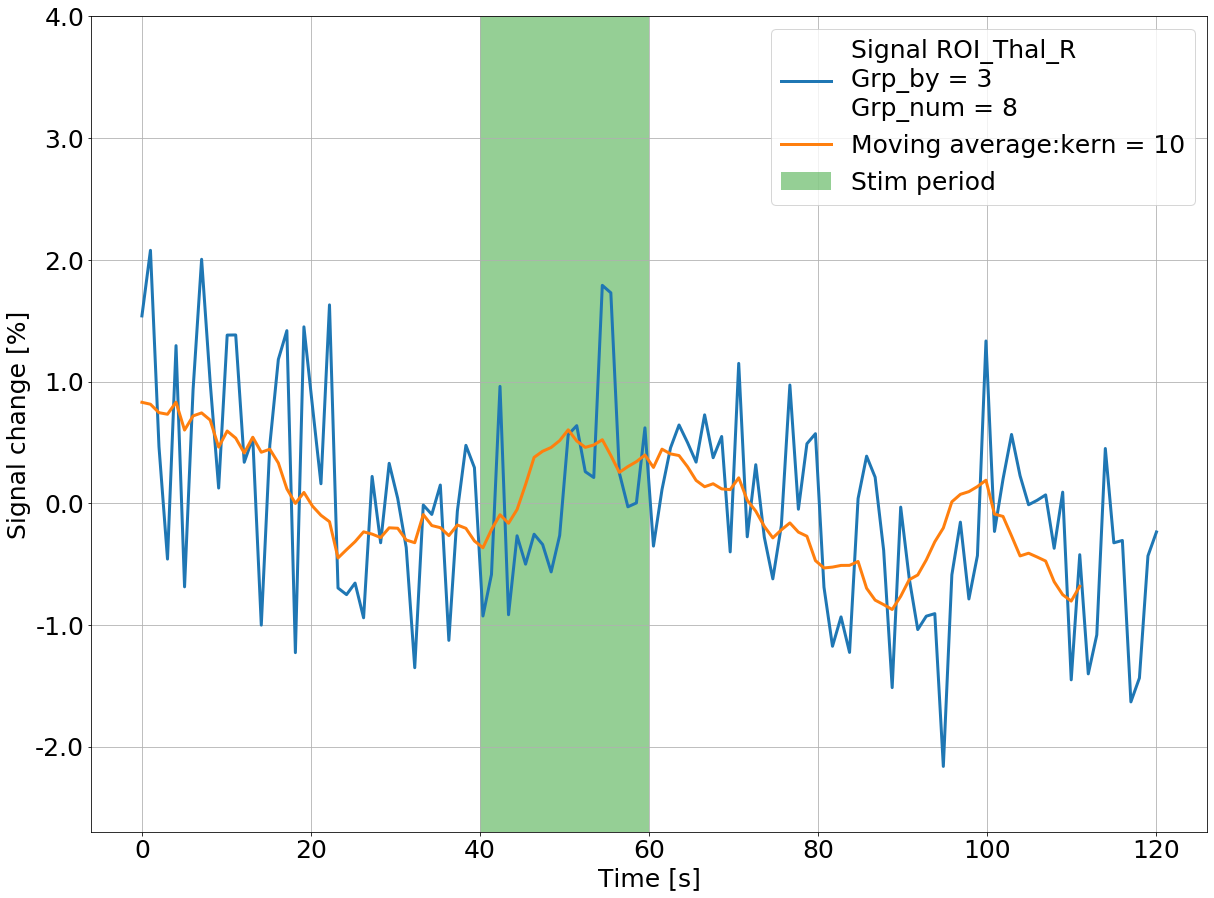

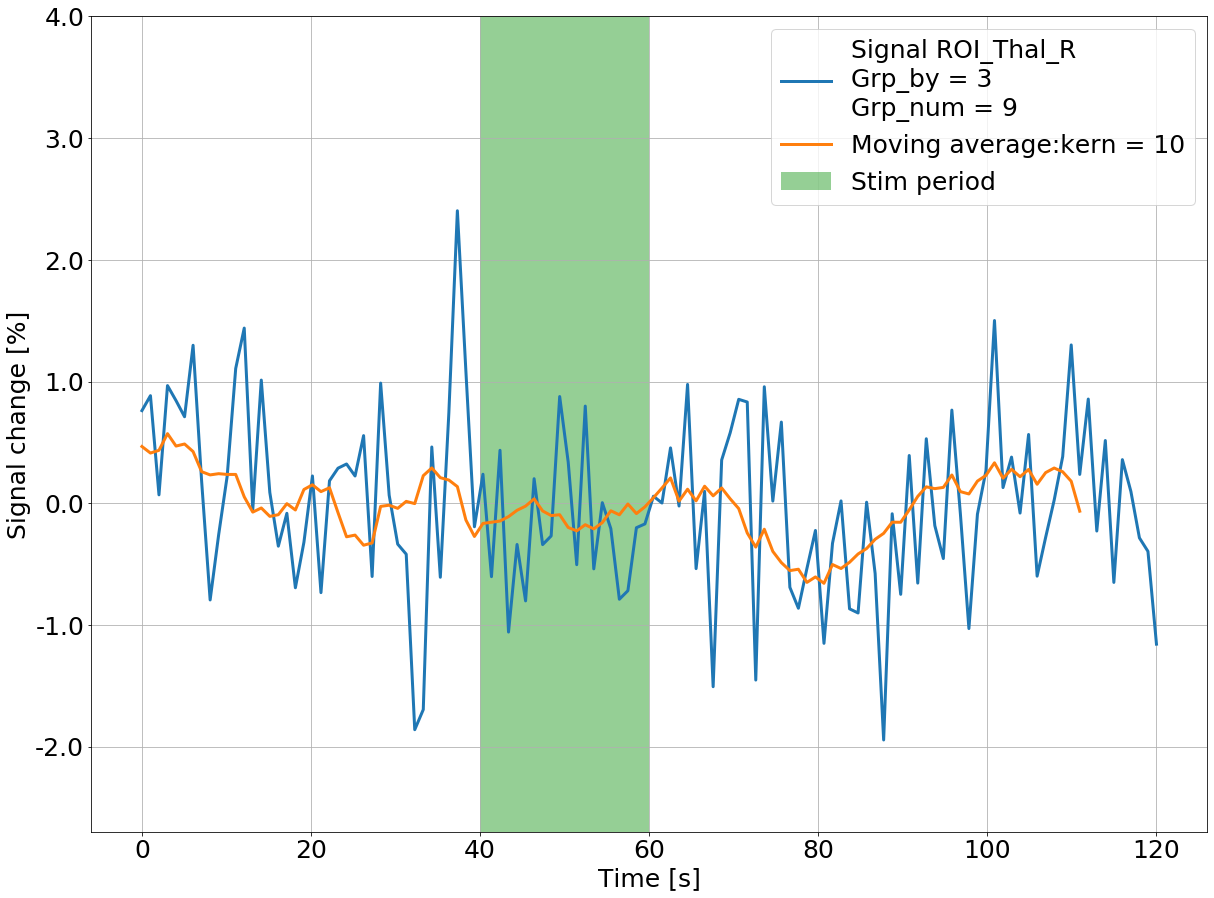

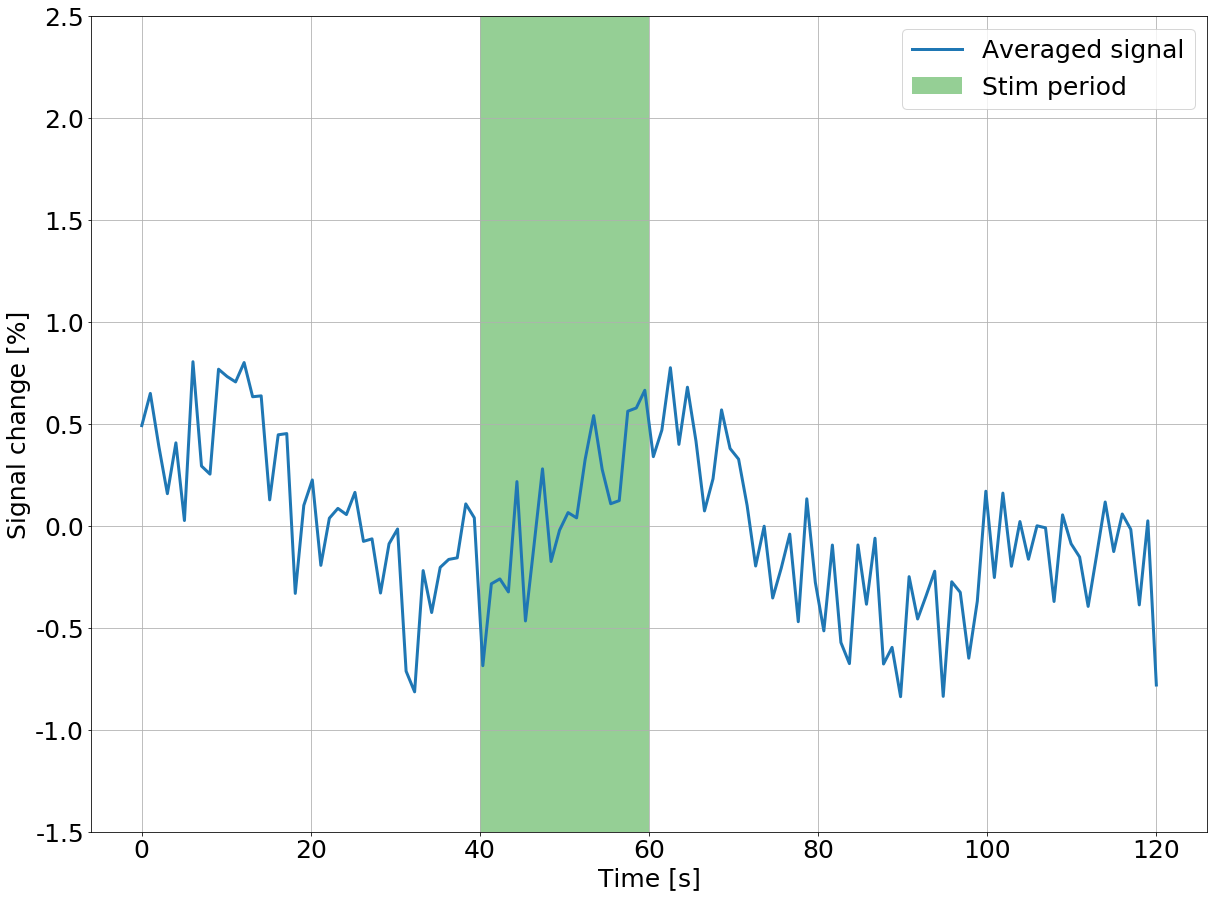

In [413]:
#Group results by BLOCKS - 
group_by = 3

for ROI in ROIs:
    blockDict [ROI] = list(zip(*[iter(dataDict[ROI])]*group_by))

for ROI in ROIs:
#ROI = ROIs[2]
    for group in range(np.shape(blockDict[ROI])[0]):
        y = np.mean(blockDict[ROI][group], axis=0)*100/np.mean(blockDict[ROI][group][0:preStim])-100
        plt.plot(x_main, y, '-', linewidth=3)
        ax = plt.gca()
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.set_ylim([-2.7, 4.0])
        y_mov_aver = np.convolve(y, np.ones((10,))/10, mode='valid')
        plt.plot(x_main[0:111], y_mov_aver, '-', linewidth=3)
        plt.axvspan(40, 60, facecolor='#2ca02c', alpha=0.5)
        plt.legend(('Signal {} \nGrp_by = {} \nGrp_num = {}'.format(ROI, group_by, group+1),
                    'Moving average:kern = 10', 'Stim period'), loc='upper right')
        plt.grid()
        plt.xlabel('Time [s]')
        plt.ylabel('Signal change [%]')
        plt.show()
        
    plt.plot(x_main, np.mean(dataDict[ROI], axis=0)*100/np.mean(dataDict[ROI][0:preStim])-100, 
         '-', linewidth=3)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax.set_ylim([-1.5, 2.5])
    plt.axvspan(40, 60, facecolor='#2ca02c', alpha=0.5)
    plt.legend(('Averaged signal', 'Stim period'), loc='upper right')
    plt.grid()
    plt.xlabel('Time [s]')
    plt.ylabel('Signal change [%]')
    plt.show()

In [91]:
#for ROI in ROIs:
#    BL = []
#    STD = []
#    for trial in range(np.shape(dataDict[ROI])[0]):
#        BL.append(np.mean(dataDict[ROI][trial][0:preStim]))
#        STD.append(np.std(dataDict[ROI][trial][0:preStim]))
#        dataDict['BL_'+ROI] = BL
#        dataDict['STD_'+ROI] = STD
    #print(dataDict['STD_'+ROI])
    #print(BL.append(np.mean(dataDict[ROI][trial][0:preStim])))


#nums = []
#for k in range(len(filelist)):
#    if os.listdir(opj(base_dir, sub[i], ses_list[i][j]))[k][:-4].rsplit('_', 1)[1].isnumeric(): 
#         nums.append(int(os.listdir(opj(base_dir, sub[i], ses_list[i][j]))[k][:-4].rsplit('_', 1)[1]))
#filelist = sorted(filelist, key=nums)
#filelist = sorted(filelist,key=nums)
#int(os.listdir(opj(base_dir, sub[i], ses_list[i][j]))[0][:-4].rsplit('_', 1)[1])

In [182]:
range(np.shape(blockDict[ROI])[0])

range(0, 8)